# Overall

```
- 프로젝트명 : 개발언어 사용자 분석
- 프로젝트유형 : 데이터 EDA
- 시나리오 : 개발언어 사용 현황 조사 데이터를 바탕으로 개발언어 사용 현황에 대한 EDA, 시각화 수행
- 분석상세
    - 인기 있는 언어
    - 사용 희망 언어
    - 언어별 사용자 수, 사용 희망자 수
    - 데이터 직군 상위 언어
    - 데이터 직군별 상세 비교
    - 언어별 주요 직군
    - 언어별 연봉
    - 언어별 연봉 중간값
    - 언어별 연봉 분포
- DATA
    Stack Overflow Annual Devloper Survey
    https://survey.stackoverflow.co/
- Meta data
    - “Developer”인가? : MainBranch
    - 나이 : Age
    - 고용 상태 : Employment
    - 근무상황 (재택) : RemoteWork
    - 학력 : EdLevel
    - 코딩 경력 : YearsCodePro
    - 직업 : DevType
    - 나라 : Country
    - 통화 : Currency
    - 연봉 : CompTotal
    - 사용했던/사용을 원하는 개발언어 : Language
    - 업무 경력 : WorkExp
    - 산업군 : Industry

```
<!-- https://colab.research.google.com/drive/1i31raLJ4hpfQaSa9_kw11kNoEAOdSpsU -->
<!-- https://colab.research.google.com/drive/155SzUuq1E8mvQxOjAreLtGUS_UCmFm9d#toc0_ -->

# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install koreanize_matplotlib
import koreanize_matplotlib
# import seaborn as sns

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/001. study_course_certificate_수료증/zerobase/09. Python 데이터 분석/Chapter 1. 개발언어 사용자 분석/Data/survey_results_public.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [ ]:
# 필요 컬럼 필터
columns = ["ResponseId", "MainBranch", "Age", "Employment", "RemoteWork", "EdLevel", "YearsCodePro", "DevType", "Country", "Currency", "CompTotal", "LanguageHaveWorkedWith", "LanguageWantToWorkWith", "WorkExp", "Industry"]
df = df[columns]

In [ ]:
# mock data row 0 drop
df = df.drop(index = 0).reset_index(drop = True)
df.head(3)

,ResponseId,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,WorkExp,Industry
0,2,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Senior Executive (C-Suite, VP, etc.)",United States of America,USD\tUnited States dollar,"285,000.00",HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,10.00,"Information Services, IT, Software Development..."
1,3,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Developer, back-end",United States of America,USD\tUnited States dollar,"250,000.00",Bash/Shell (all shells);Go,Haskell;OCaml;Rust,23.00,"Information Services, IT, Software Development..."
2,4,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Developer, front-end",United States of America,USD\tUnited States dollar,"156,000.00",Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,7.00,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89183 entries, 0 to 89182
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              89183 non-null  int64  
 1   MainBranch              89183 non-null  object 
 2   Age                     89183 non-null  object 
 3   Employment              87898 non-null  object 
 4   RemoteWork              73810 non-null  object 
 5   EdLevel                 87973 non-null  object 
 6   YearsCodePro            66136 non-null  object 
 7   DevType                 76872 non-null  object 
 8   Country                 87973 non-null  object 
 9   Currency                65334 non-null  object 
 10  CompTotal               48225 non-null  float64
 11  LanguageHaveWorkedWith  87140 non-null  object 
 12  LanguageWantToWorkWith  80709 non-null  object 
 13  WorkExp                 43579 non-null  float64
 14  Industry                36774 non-null

# Functions & Variables

In [ ]:
DATA_DEVS = ['Data or business analyst','Data scientist or machine learning specialist', 'Engineer, data']
COMP_KRW = 'CompTotalKrw'
standard_figsize = (20, 20)

def draw_median_salary_barh (df, target, title, ylabel, figsize = standard_figsize) :
    plt.figure(figsize = figsize)
    plt.barh(y = df[target], width = df[COMP_KRW])

    plt.xlabel('연봉 중간값 (KRW, 만원)', fontweight = 'bold')
    plt.ylabel(ylabel, fontweight = 'bold')
    plt.title(title, fontsize = 15, fontweight = 'bold')
    plt.xticks(np.arange(0, df[COMP_KRW].values.max() + 1000, 1000), rotation = 45)
    plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)

    plt.show()




# EDA

In [ ]:
pd.set_option('display.float_format', '{:,.2f}'.format)
df.describe()

,ResponseId,CompTotal,WorkExp
count,"89,183.00","48,225.00","43,579.00"
mean,"44,593.00","1,036,806,635,562,467,391,394,372,602,402,550,2...",11.41
std,"25,745.06","227,684,720,124,324,374,955,124,620,267,587,368...",9.05
min,2.00,0.00,0.00
25%,"22,297.50","63,000.00",5.00
50%,"44,593.00","115,000.00",9.00
75%,"66,888.50","230,000.00",16.00
max,"89,184.00","49,999,999,999,999,992,051,087,350,427,974,655,...",50.00


In [ ]:
df.describe(include="O").T

,count,unique,top,freq
MainBranch,89183,6,I am a developer by profession,67237
Age,89183,8,25-34 years old,33247
Employment,87898,106,"Employed, full-time",53748
RemoteWork,73810,3,"Hybrid (some remote, some in-person)",31131
EdLevel,87973,8,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",36706
YearsCodePro,66136,52,5,4792
DevType,76872,33,"Developer, full-stack",25735
Country,87973,185,United States of America,18647
Currency,65334,144,EUR European Euro,17651
LanguageHaveWorkedWith,87140,32641,HTML/CSS;JavaScript;TypeScript,1487


In [ ]:
df.isna().sum()

,0
ResponseId,0
MainBranch,0
Age,0
Employment,1285
RemoteWork,15373
EdLevel,1210
YearsCodePro,23047
DevType,12311
Country,1210
Currency,23849


In [ ]:
# MainBranch
df['MainBranch'].value_counts(dropna=False)

,count
MainBranch,
I am a developer by profession,67237
"I am not primarily a developer, but I write code sometimes as part of my work/studies",8954
I am learning to code,4961
I code primarily as a hobby,4960
"I used to be a developer by profession, but no longer am",1861
None of these,1210


In [ ]:
PRO_DEV = "I am a developer by profession"
SEMI_DEV = "I am not primarily a developer, but I write code sometimes as part of my work/studies"
EX_DEV = "I used to be a developer by profession, but no longer am"
targetBranch = [PRO_DEV, SEMI_DEV, EX_DEV]


In [ ]:
devs_df = df[df['MainBranch'].isin(targetBranch)]
display(devs_df['MainBranch'].value_counts())
devs_df.info()

,count
MainBranch,
I am a developer by profession,67237
"I am not primarily a developer, but I write code sometimes as part of my work/studies",8954
"I used to be a developer by profession, but no longer am",1861


<class 'pandas.core.frame.DataFrame'>
Index: 78052 entries, 0 to 89182
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              78052 non-null  int64  
 1   MainBranch              78052 non-null  object 
 2   Age                     78052 non-null  object 
 3   Employment              78013 non-null  object 
 4   RemoteWork              71568 non-null  object 
 5   EdLevel                 78052 non-null  object 
 6   YearsCodePro            66136 non-null  object 
 7   DevType                 73362 non-null  object 
 8   Country                 78052 non-null  object 
 9   Currency                65334 non-null  object 
 10  CompTotal               48225 non-null  float64
 11  LanguageHaveWorkedWith  77556 non-null  object 
 12  LanguageWantToWorkWith  71779 non-null  object 
 13  WorkExp                 43118 non-null  float64
 14  Industry                36393 non-null  obj

In [ ]:
# Age
## devs_df 의 분포와도 큰 차이가 없는지
display(
    df['Age'].value_counts(normalize=True, dropna=False)
    , devs_df['Age'].value_counts(normalize=True, dropna=False))


,proportion
Age,
25-34 years old,0.37
35-44 years old,0.23
18-24 years old,0.20
45-54 years old,0.09
Under 18 years old,0.05
55-64 years old,0.04
65 years or older,0.01
Prefer not to say,0.01


,proportion
Age,
25-34 years old,0.41
35-44 years old,0.25
18-24 years old,0.17
45-54 years old,0.10
55-64 years old,0.04
65 years or older,0.01
Under 18 years old,0.01
Prefer not to say,0.00


In [ ]:
# 'Employment'
devs_df['Employment'].value_counts(dropna = True)

,count
Employment,
"Employed, full-time",52813
"Independent contractor, freelancer, or self-employed",6758
"Employed, full-time;Independent contractor, freelancer, or self-employed",4315
"Student, full-time",2972
"Not employed, but looking for work",1649
...,...
"Employed, full-time;Student, full-time;Not employed, and not looking for work",1
"Employed, full-time;Student, full-time;Employed, part-time;Student, part-time;Not employed, and not looking for work",1
"Independent contractor, freelancer, or self-employed;Not employed, but looking for work;Employed, part-time;Retired",1


In [ ]:
# hasnans
devs_df['Employment'].hasnans

True

In [ ]:
# nan 값이 40 개 정도 밖에 없어서 삭제 후 진행
devs_df.dropna()
# devs_df['Employment'].


,ResponseId,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,WorkExp,Industry
0,2,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Senior Executive (C-Suite, VP, etc.)",United States of America,USD\tUnited States dollar,"285,000.00",HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,10.00,"Information Services, IT, Software Development..."
1,3,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Developer, back-end",United States of America,USD\tUnited States dollar,"250,000.00",Bash/Shell (all shells);Go,Haskell;OCaml;Rust,23.00,"Information Services, IT, Software Development..."
3,5,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Developer, full-stack",Philippines,PHP\tPhilippine peso,"1,320,000.00",HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;Python;Rust;TypeScript,6.00,Other
4,6,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Some college/university study without earning ...,21,"Developer, back-end",United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,"78,000.00",Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,Go;Rust,22.00,Other
6,8,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,"Developer, full-stack",United States of America,USD\tUnited States dollar,"80,000.00",Go;HTML/CSS;JavaScript;Python;Rust;SQL;TypeScript,Elixir;Go;Julia;Python;R;Rust;Scala;SQL;TypeSc...,5.00,Financial Services
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89173,89175,I am a developer by profession,18-24 years old,"Employed, full-time",In-person,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",1,"Developer, full-stack",Pakistan,PKR\tPakistani rupee,"1,200,000.00",Bash/Shell (all shells);C;C++;HTML/CSS;JavaScr...,Assembly;Bash/Shell (all shells);C;C++;HTML/CS...,2.00,"Manufacturing, Transportation, or Supply Chain"
89174,89176,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,"Developer, mobile",United States of America,USD\tUnited States dollar,"135,000.00",Java;Kotlin,Dart;Java;JavaScript;Kotlin,8.00,"Information Services, IT, Software Development..."
89176,89178,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11,"Developer, full-stack",Mexico,MXN\tMexican peso,"1,000,000.00",Bash/Shell (all shells);C#;C++;Cobol;Groovy;PH...,HTML/CSS;Java;JavaScript;SQL;TypeScript,12.00,Financial Services
89177,89179,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",22,"Developer, full-stack",United States of America,USD\tUnited States dollar,"212,021.00",JavaScript;TypeScript,Go;JavaScript;Python;TypeScript,22.00,Insurance


In [ ]:
# devs_df['Employment'].dropna().str.split(';')
split_employment_lists = devs_df['Employment'].dropna().str.split(';')

In [ ]:
# ? 어렵다 이건
# flattened_employment_list = [val for sublist in split_employment_lists for val in sublist]
# flattened_employment_list

# unique_values = set(flattened_employment_list)
# unique_values

In [ ]:
# flatten 작업을 func로 만들기

# 세미콜론(;)으로 구분된 문자열 리스트를 평탄화(flatten)하는 함수 정의
def get_flattened_list(nested_series):
    # 1. 결측값(NaN) 제거 후, 세미콜론(;) 기준으로 문자열을 나눠 리스트로 변환
    split_lists = nested_series.dropna().str.split(';')

    # 2. 리스트 내의 모든 하위 리스트를 평탄화 → 하나의 리스트로 합침
    # 예: [['a','b'], ['c']] → ['a','b','c']
    return [val for sublist in split_lists for val in sublist]

# 중첩 문자열 Series에서 유일한 값들만 추출하는 함수
def get_unique_values(nested_series):
    # 1. 평탄화된 전체 값 리스트 가져오기
    flattened_list = get_flattened_list(nested_series)

    # 2. 중복 제거(set) 후 다시 list로 변환
    unique_values = set(flattened_list)
    return list(unique_values)


In [ ]:
# 생성한 func 베이스로 employment 와 language 컬럼 flattend 작업
flattened_employment_list = get_flattened_list(devs_df['Employment'])
# flattened_language_list = get_flattened_list(devs_df['LanguageHaveWorkedWith'])

# unique_employment = get_unique_values(flattened_employment_list)
unique_language = get_unique_values(devs_df['Employment'])
unique_language

['Retired',
 'Student, full-time',
 'Employed, full-time',
 'Not employed, but looking for work',
 'I prefer not to say',
 'Independent contractor, freelancer, or self-employed',
 'Not employed, and not looking for work',
 'Student, part-time',
 'Employed, part-time']

In [ ]:
pd.Series(flattened_employment_list).value_counts(dropna=False)

,count
"Employed, full-time",59794
"Independent contractor, freelancer, or self-employed",13255
"Student, full-time",6225
"Employed, part-time",4497
"Not employed, but looking for work",2628
"Student, part-time",2549
"Not employed, and not looking for work",553
Retired,513
I prefer not to say,233


In [ ]:
# devs_df['Employment'] 컬럼의 nans 값 39개 삭제
devs_df = devs_df.dropna(subset = 'Employment')
devs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78013 entries, 0 to 89182
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              78013 non-null  int64  
 1   MainBranch              78013 non-null  object 
 2   Age                     78013 non-null  object 
 3   Employment              78013 non-null  object 
 4   RemoteWork              71568 non-null  object 
 5   EdLevel                 78013 non-null  object 
 6   YearsCodePro            66108 non-null  object 
 7   DevType                 73362 non-null  object 
 8   Country                 78013 non-null  object 
 9   Currency                65298 non-null  object 
 10  CompTotal               48213 non-null  float64
 11  LanguageHaveWorkedWith  77520 non-null  object 
 12  LanguageWantToWorkWith  71750 non-null  object 
 13  WorkExp                 43107 non-null  float64
 14  Industry                36386 non-null  obj

In [ ]:
# flattened_employement_list 필요 값만 선정
# "Employed, full-time"
# "Independent contractor, freelancer, or self-employed"
# "Employed, part-time"


In [ ]:
# 대상값이 포함되어 있는 컬럼만 get

## filter condition 생성
employment_condition1 = devs_df['Employment'].str.contains("Employed, full-time")
employment_condition2 = devs_df['Employment'].str.contains("Independent contractor, freelancer, or self-employed")
employment_condition3 = devs_df['Employment'].str.contains("Employed, part-time")

## filter condition 하나라도 해당되는 모든 값을 fliter 후 재할당
devs_df = devs_df[employment_condition1 | employment_condition2 | employment_condition3]

In [ ]:
devs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71582 entries, 0 to 89182
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              71582 non-null  int64  
 1   MainBranch              71582 non-null  object 
 2   Age                     71582 non-null  object 
 3   Employment              71582 non-null  object 
 4   RemoteWork              71568 non-null  object 
 5   EdLevel                 71582 non-null  object 
 6   YearsCodePro            65569 non-null  object 
 7   DevType                 71342 non-null  object 
 8   Country                 71582 non-null  object 
 9   Currency                64932 non-null  object 
 10  CompTotal               48126 non-null  float64
 11  LanguageHaveWorkedWith  71186 non-null  object 
 12  LanguageWantToWorkWith  65837 non-null  object 
 13  WorkExp                 43062 non-null  float64
 14  Industry                36349 non-null  obj

# Remotework

In [ ]:
display(devs_df['RemoteWork'].value_counts(dropna=False))
devs_df = devs_df.dropna(subset = 'RemoteWork')
display(devs_df['RemoteWork'].value_counts(dropna=False))

,count
RemoteWork,
"Hybrid (some remote, some in-person)",30443
Remote,29956
In-person,11169
NaN,14


,count
RemoteWork,
"Hybrid (some remote, some in-person)",30443
Remote,29956
In-person,11169


# EdLevel

In [ ]:
devs_df['EdLevel'].value_counts(dropna = False)

,count
EdLevel,
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",32650
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",19050
Some college/university study without earning a degree,8835
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",3883
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",3510
"Associate degree (A.A., A.S., etc.)",2311
Something else,876
Primary/elementary school,453


# YearsCodePro

In [ ]:
devs_df['YearsCodePro'].value_counts(dropna = False).sort_index(ascending=True)
devs_df['YearsCodePro'].unique()

array(['9', '23', '7', '4', '21', '3', '15', 'Less than 1 year', '10',
       '2', '6', '14', '5', '19', '13', '16', '28', nan, '1', '30', '11',
       '8', '25', '32', '24', '40', '17', '29', '12', '31', '20', '18',
       '50', '27', '43', '22', '26', '38', '33', '44', '35', '34', '37',
       '42', 'More than 50 years', '47', '36', '39', '41', '48', '45',
       '46', '49'], dtype=object)

In [ ]:
# 일부 언어에 대해 문자열 데이터의 조정
devs_df['YearsCodePro'] = devs_df['YearsCodePro'].replace({'Less than 1 year' : '0.5', 'More than 50 years' : '51'})
devs_df['YearsCodePro'].unique()

array(['9', '23', '7', '4', '21', '3', '15', '0.5', '10', '2', '6', '14',
       '5', '19', '13', '16', '28', nan, '1', '30', '11', '8', '25', '32',
       '24', '40', '17', '29', '12', '31', '20', '18', '50', '27', '43',
       '22', '26', '38', '33', '44', '35', '34', '37', '42', '51', '47',
       '36', '39', '41', '48', '45', '46', '49'], dtype=object)

In [ ]:
# str 데이터의 수치형 전환
devs_df['YearsCodePro'] = pd.to_numeric(devs_df['YearsCodePro']).astype('float')
devs_df['YearsCodePro'].unique()

array([ 9. , 23. ,  7. ,  4. , 21. ,  3. , 15. ,  0.5, 10. ,  2. ,  6. ,
       14. ,  5. , 19. , 13. , 16. , 28. ,  nan,  1. , 30. , 11. ,  8. ,
       25. , 32. , 24. , 40. , 17. , 29. , 12. , 31. , 20. , 18. , 50. ,
       27. , 43. , 22. , 26. , 38. , 33. , 44. , 35. , 34. , 37. , 42. ,
       51. , 47. , 36. , 39. , 41. , 48. , 45. , 46. , 49. ])

# DevType

In [ ]:
# 몇개 있는가
devs_df['DevType'].isna().value_counts()

,count
DevType,
False,71331
True,237


In [ ]:
devs_df.dropna(subset = 'DevType', inplace = True)
# devs_df = devs_df.dropna(subset = 'DevType')
devs_df['DevType'].isna().value_counts()

,count
DevType,
False,71331


In [ ]:
devs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71331 entries, 0 to 89182
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              71331 non-null  int64  
 1   MainBranch              71331 non-null  object 
 2   Age                     71331 non-null  object 
 3   Employment              71331 non-null  object 
 4   RemoteWork              71331 non-null  object 
 5   EdLevel                 71331 non-null  object 
 6   YearsCodePro            65450 non-null  float64
 7   DevType                 71331 non-null  object 
 8   Country                 71331 non-null  object 
 9   Currency                64705 non-null  object 
 10  CompTotal               48089 non-null  float64
 11  LanguageHaveWorkedWith  70970 non-null  object 
 12  LanguageWantToWorkWith  65658 non-null  object 
 13  WorkExp                 42994 non-null  float64
 14  Industry                36329 non-null  obj

# Country

In [ ]:
# 큰 특이사항 없어 유지
# 출생지가 아닌, 현재 거주지 정보
display(
    devs_df['Country'].hasnans
    , devs_df['Country'].value_counts()
)


False

,count
Country,
United States of America,15590
Germany,6063
United Kingdom of Great Britain and Northern Ireland,4672
India,3931
Canada,2891
...,...
Central African Republic,1
Cape Verde,1
San Marino,1


# Currency

In [ ]:
devs_df['Currency'].value_counts()
devs_df['Currency'].isna().value_counts()

,count
Currency,
False,64705
True,6626


In [ ]:
# currency 를 한국돈으로 맞추기
devs_df['Currency'] = devs_df['Currency'].str.slice(start = 0, stop = 3)

In [ ]:
devs_df['Currency'].isin(['KRW']).value_counts()

,count
Currency,
False,71147
True,184


# pickle

In [ ]:
import pickle

with open("/content/drive/MyDrive/001. study_course_certificate_수료증/zerobase/09. Python 데이터 분석/Chapter 1. 개발언어 사용자 분석/Data/forex.pkl", 'rb') as file:
    forex = pickle.load(file)

display(forex)

{'base': 'KRW',
 'results': {'USD': 0.00077,
  'PHP': 0.04257,
  'GBP': 0.0006,
  'EUR': 0.0007,
  'AUD': 0.00117,
  'SEK': 0.00822,
  'AMD': 0.29761,
  'ZAR': 0.01419,
  'BRL': 0.0037,
  'BDT': 0.08418,
  'CAD': 0.00103,
  'CHF': 0.00068,
  'LKR': 0.24181,
  'INR': 0.06377,
  'IRR': 32.42385,
  'PLN': 0.00313,
  'RUB': 0.07164,
  'DKK': 0.00524,
  'ILS': 0.00283,
  'HUF': 0.27364,
  'SGD': 0.00103,
  'TRY': 0.02084,
  'AED': 0.00284,
  'NOK': 0.00786,
  'RSD': 0.08217,
  'NPR': 0.10195,
  'RON': 0.00347,
  'CNY': 0.00555,
  'SAR': 0.00289,
  'TND': 0.00238,
  'VND': 18.27314,
  'UAH': 0.02832,
  'DOP': 0.04342,
  'EGP': 0.02393,
  'UZS': 8.99345,
  'ISK': 0.10145,
  'BGN': 0.00137,
  'PKR': 0.22192,
  'IDR': 11.7155,
  'GEL': 0.00202,
  'XOF': 0.46154,
  'CZK': 0.01681,
  'BHD': 0.00029,
  'TJS': 0.00844,
  'ARS': 0.21343,
  'COP': 3.09707,
  'BTN': 0.06344,
  'OMR': 0.0003,
  'BAM': 0.00138,
  'MYR': 0.00351,
  'LBP': 11.58596,
  'ALL': 0.07212,
  'NGN': 0.58549,
  'KES': 0.11005,
  

In [ ]:
currencies = list(forex['results'].keys())

In [ ]:
devs_df_comp = devs_df[devs_df['Currency'].isin(currencies)].copy()
devs_df_comp = devs_df_comp.dropna(subset = ['Currency', 'CompTotal'])
devs_df_comp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47932 entries, 0 to 89182
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              47932 non-null  int64  
 1   MainBranch              47932 non-null  object 
 2   Age                     47932 non-null  object 
 3   Employment              47932 non-null  object 
 4   RemoteWork              47932 non-null  object 
 5   EdLevel                 47932 non-null  object 
 6   YearsCodePro            47746 non-null  float64
 7   DevType                 47932 non-null  object 
 8   Country                 47932 non-null  object 
 9   Currency                47932 non-null  object 
 10  CompTotal               47932 non-null  float64
 11  LanguageHaveWorkedWith  47795 non-null  object 
 12  LanguageWantToWorkWith  44474 non-null  object 
 13  WorkExp                 32572 non-null  float64
 14  Industry                27683 non-null  obj

In [ ]:
# forex 의 key 값 매칭
devs_df_comp['ExchangeRateToKrw'] = devs_df_comp['Currency'].map(forex['results'])
devs_df_comp.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,WorkExp,Industry,ExchangeRateToKrw
0,2,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9.00,"Senior Executive (C-Suite, VP, etc.)",United States of America,USD,"285,000.00",HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,10.00,"Information Services, IT, Software Development...",0.00
1,3,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23.00,"Developer, back-end",United States of America,USD,"250,000.00",Bash/Shell (all shells);Go,Haskell;OCaml;Rust,23.00,"Information Services, IT, Software Development...",0.00
2,4,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7.00,"Developer, front-end",United States of America,USD,"156,000.00",Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,7.00,NaN,0.00
3,5,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4.00,"Developer, full-stack",Philippines,PHP,"1,320,000.00",HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;Python;Rust;TypeScript,6.00,Other,0.04
4,6,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Some college/university study without earning ...,21.00,"Developer, back-end",United Kingdom of Great Britain and Northern I...,GBP,"78,000.00",Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,Go;Rust,22.00,Other,0.00


In [ ]:
devs_df_comp['CompTotalKrw'] = devs_df_comp['CompTotal'] / devs_df_comp['ExchangeRateToKrw'] // 10000
devs_df_comp.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,WorkExp,Industry,ExchangeRateToKrw,CompTotalKrw
0,2,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9.00,"Senior Executive (C-Suite, VP, etc.)",United States of America,USD,"285,000.00",HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,10.00,"Information Services, IT, Software Development...",0.00,"37,012.00"
1,3,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23.00,"Developer, back-end",United States of America,USD,"250,000.00",Bash/Shell (all shells);Go,Haskell;OCaml;Rust,23.00,"Information Services, IT, Software Development...",0.00,"32,467.00"
2,4,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7.00,"Developer, front-end",United States of America,USD,"156,000.00",Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,7.00,NaN,0.00,"20,259.00"
3,5,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4.00,"Developer, full-stack",Philippines,PHP,"1,320,000.00",HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;Python;Rust;TypeScript,6.00,Other,0.04,"3,100.00"
4,6,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Some college/university study without earning ...,21.00,"Developer, back-end",United Kingdom of Great Britain and Northern I...,GBP,"78,000.00",Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,Go;Rust,22.00,Other,0.00,"13,000.00"


In [ ]:
devs_df_comp.describe()

,ResponseId,YearsCodePro,CompTotal,WorkExp,ExchangeRateToKrw,CompTotalKrw
count,"47,932.00","47,746.00","47,932.00","32,572.00","47,932.00","47,932.00"
mean,"42,324.65",10.76,"1,043,144,454,644,078,886,719,822,454,619,373,5...",11.44,0.25,"36,730,438,543,805,597,531,476,015,637,530,308,..."
std,"24,906.07",8.66,"228,379,558,481,344,672,494,455,238,786,901,703...",8.83,2.34,"8,041,533,749,352,108,896,135,299,896,772,969,5..."
min,2.00,0.50,0.00,0.00,0.00,0.00
25%,"21,199.75",4.00,"63,000.00",5.00,0.00,"5,750.00"
50%,"40,975.50",8.00,"115,000.00",9.00,0.00,"10,000.00"
75%,"63,667.75",15.00,"230,000.00",16.00,0.00,"15,989.50"
max,"89,184.00",51.00,"49,999,999,999,999,992,051,087,350,427,974,655,...",50.00,32.42,"1,760,563,380,281,689,785,073,286,269,013,544,8..."


# CompTotal


In [ ]:
# 너무 높은 연봉이 기입되어 있는 이상치들은 drop
devs_df_comp['CompTotal'].sort_values(ascending = False)

,CompTotal
56321,"49,999,999,999,999,992,051,087,350,427,974,655,..."
18462,"1,000,000,000,000,000,000,000.00"
49552,"10,000,000,000,000,000.00"
43555,"10,000,000,000,000,000.00"
15438,"4,567,886,688,856.00"
...,...
33538,0.00
86599,0.00
43265,0.00
43023,0.00


In [ ]:
fakeDataId = devs_df_comp[devs_df_comp['CompTotalKrw'] > 500000]['ResponseId']

In [ ]:
# 기존 데이터와 filtered 데이터 모두에서 삭제

devs_df_comp = devs_df_comp[~devs_df_comp['ResponseId'].isin(fakeDataId)]
devs_df_comp['CompTotalKrw'].describe()

,CompTotalKrw
count,"47,907.00"
mean,"12,357.39"
std,"12,338.42"
min,0.00
25%,"5,750.00"
50%,"10,000.00"
75%,"15,974.00"
max,"467,433.00"


In [ ]:
# min 값이 여전히 많아서 높은 편
devs_df_comp['CompTotalKrw'].value_counts().sort_index(ascending = True)

,count
CompTotalKrw,
0.00,234
1.00,25
2.00,14
3.00,15
4.00,18
...,...
"336,626.00",1
"350,649.00",1
"377,786.00",1


In [ ]:
devs_df_comp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47907 entries, 0 to 89182
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              47907 non-null  int64  
 1   MainBranch              47907 non-null  object 
 2   Age                     47907 non-null  object 
 3   Employment              47907 non-null  object 
 4   RemoteWork              47907 non-null  object 
 5   EdLevel                 47907 non-null  object 
 6   YearsCodePro            47722 non-null  float64
 7   DevType                 47907 non-null  object 
 8   Country                 47907 non-null  object 
 9   Currency                47907 non-null  object 
 10  CompTotal               47907 non-null  float64
 11  LanguageHaveWorkedWith  47770 non-null  object 
 12  LanguageWantToWorkWith  44453 non-null  object 
 13  WorkExp                 32557 non-null  float64
 14  Industry                27675 non-null  obj

In [ ]:
zeroCompId = devs_df_comp[devs_df_comp['CompTotalKrw'] == 0]['ResponseId']

In [ ]:
# 기존 데이터와 filtered 데이터 모두에서 삭제

devs_df_comp = devs_df_comp[~devs_df_comp['ResponseId'].isin(zeroCompId)]
devs_df_comp['CompTotalKrw'].describe()

,CompTotalKrw
count,"47,673.00"
mean,"12,418.04"
std,"12,338.18"
min,1.00
25%,"5,833.00"
50%,"10,000.00"
75%,"16,061.00"
max,"467,433.00"


In [ ]:
devs_df = devs_df[~devs_df['ResponseId'].isin(fakeDataId)]

In [ ]:
# min 은 왜 안없애는건지
devs_df['CompTotal'].describe()

,CompTotal
count,"48,064.00"
mean,"13,686,815.10"
std,"512,745,190.77"
min,0.00
25%,"63,000.00"
50%,"115,000.00"
75%,"230,000.00"
max,"100,000,000,000.00"


# Language

In [ ]:
# flatten 작업을 func로 만들기

# 이런 방식으로 쌓은 뒤에 이것을 set 함수 통해서 unique 값만 남긴 후 list로 출력
# # split_lists: 리스트 안에 리스트가 있는 구조 (예: [['a', 'b'], ['c'], ['d', 'e']])
# for sublist in split_lists:
#     for val in sublist:
#         flattened_list.append(val)

def get_flattened_list(nested_series) :
    split_lists = nested_series.dropna().str.split(';')
    return [val for sublist in split_lists for val in sublist]

def get_unique_values(nested_series) :
    flattened_list = get_flattened_list(nested_series)
    unique_values = set(flattened_list)
    return list(unique_values)

In [ ]:
devs_df['LanguageHaveWorkedWith'].value_counts()

,count
LanguageHaveWorkedWith,
HTML/CSS;JavaScript;TypeScript,1308
Python,765
HTML/CSS;JavaScript;PHP;SQL,639
C#,572
C#;HTML/CSS;JavaScript;SQL;TypeScript,555
...,...
Bash/Shell (all shells);C++;HTML/CSS;JavaScript;Lua;Python;Rust;SQL,1
Bash/Shell (all shells);C;C#;HTML/CSS;JavaScript;PHP;Python,1
Bash/Shell (all shells);JavaScript;OCaml;Prolog,1


In [ ]:
flattened_lang_list = get_flattened_list(devs_df['LanguageHaveWorkedWith'])
language_sr = pd.Series(flattened_lang_list)
language_sr.value_counts(normalize=True)
#get_unique_values


,proportion
JavaScript,0.12
HTML/CSS,0.10
SQL,0.10
Python,0.09
TypeScript,0.08
Bash/Shell (all shells),0.06
Java,0.06
C#,0.05
C++,0.04
PHP,0.04


In [ ]:
flattened_prf_lang_list = get_flattened_list(devs_df['LanguageWantToWorkWith'])
language_prf_sr = pd.Series(flattened_prf_lang_list)
language_prf_sr.value_counts(normalize=True)

,proportion
JavaScript,0.10
Python,0.09
TypeScript,0.09
SQL,0.09
HTML/CSS,0.08
Rust,0.07
C#,0.05
Go,0.05
Bash/Shell (all shells),0.05
Java,0.04


In [ ]:
# explode 기능을 활용한 'LanguageHaveWorkedWith' 의 전처리
devs_lang_df = devs_df.copy()
devs_lang_df['LanguageHaveWorkedWith'] = devs_lang_df['LanguageHaveWorkedWith'].str.split(';')
devs_lang_df = devs_lang_df.explode('LanguageHaveWorkedWith')
devs_lang_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 373563 entries, 0 to 89182
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ResponseId              373563 non-null  int64  
 1   MainBranch              373563 non-null  object 
 2   Age                     373563 non-null  object 
 3   Employment              373563 non-null  object 
 4   RemoteWork              373563 non-null  object 
 5   EdLevel                 373563 non-null  object 
 6   YearsCodePro            334685 non-null  float64
 7   DevType                 373563 non-null  object 
 8   Country                 373563 non-null  object 
 9   Currency                330330 non-null  object 
 10  CompTotal               247026 non-null  float64
 11  LanguageHaveWorkedWith  373202 non-null  object 
 12  LanguageWantToWorkWith  345903 non-null  object 
 13  WorkExp                 226946 non-null  float64
 14  Industry                19

In [ ]:
lang_by_devtype = devs_lang_df.groupby(['DevType', 'LanguageHaveWorkedWith'])['ResponseId'].count().reset_index(name = 'Count')
lang_by_devtype.head()

,DevType,LanguageHaveWorkedWith,Count
0,Academic researcher,APL,8
1,Academic researcher,Ada,26
2,Academic researcher,Apex,5
3,Academic researcher,Assembly,118
4,Academic researcher,Bash/Shell (all shells),524


In [ ]:
# data 직군의 결과값만 filter
lang_by_devtype[lang_by_devtype['DevType'].str.contains('data', case = False) & ~lang_by_devtype['DevType'].str.contains('database', case = False)]['DevType']

,DevType
153,Data or business analyst
154,Data or business analyst
155,Data or business analyst
156,Data or business analyst
157,Data or business analyst
...,...
995,"Engineer, data"
996,"Engineer, data"
997,"Engineer, data"
998,"Engineer, data"


In [ ]:
# Data 직군만 별도의 리스트로 변수 생성
DATA_DEVS = ['Data or business analyst','Data scientist or machine learning specialist', 'Engineer, data']
# lang_by_devtype[lang_by_devtype['DevType'].str.contains('data', case = False) & ~lang_by_devtype['DevType'].str.contains('database', case = False)]['DevType'].unique()

In [ ]:
lang_by_data_devs = lang_by_devtype[lang_by_devtype['DevType'].isin( DATA_DEVS)].copy()
lang_by_data_devs.sort_values(by = ["DevType", "Count"], ascending = False)

,DevType,LanguageHaveWorkedWith,Count
986,"Engineer, data",Python,1039
992,"Engineer, data",SQL,879
953,"Engineer, data",Bash/Shell (all shells),531
973,"Engineer, data",JavaScript,435
970,"Engineer, data",HTML/CSS,340
...,...,...,...
181,Data or business analyst,Nim,3
182,Data or business analyst,OCaml,2
200,Data or business analyst,Zig,2
153,Data or business analyst,APL,1


In [ ]:
for dev in DATA_DEVS :
    top5_lang = lang_by_data_devs[lang_by_data_devs['DevType'] == dev].sort_values(by = "Count", ascending = False) [:5]
    display(top5_lang)

,DevType,LanguageHaveWorkedWith,Count
193,Data or business analyst,SQL,535
188,Data or business analyst,Python,485
175,Data or business analyst,JavaScript,299
172,Data or business analyst,HTML/CSS,295
189,Data or business analyst,R,194


,DevType,LanguageHaveWorkedWith,Count
237,Data scientist or machine learning specialist,Python,1397
243,Data scientist or machine learning specialist,SQL,833
205,Data scientist or machine learning specialist,Bash/Shell (all shells),536
224,Data scientist or machine learning specialist,JavaScript,463
238,Data scientist or machine learning specialist,R,427


,DevType,LanguageHaveWorkedWith,Count
986,"Engineer, data",Python,1039
992,"Engineer, data",SQL,879
953,"Engineer, data",Bash/Shell (all shells),531
973,"Engineer, data",JavaScript,435
970,"Engineer, data",HTML/CSS,340


In [ ]:
devs_prflang_df = devs_df.copy()
devs_prflang_df['LanguageWantToWorkWith'] = devs_prflang_df['LanguageWantToWorkWith'].str.split(';')
devs_prflang_df = devs_prflang_df.explode('LanguageWantToWorkWith')
devs_prflang_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298167 entries, 0 to 89182
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ResponseId              298167 non-null  int64  
 1   MainBranch              298167 non-null  object 
 2   Age                     298167 non-null  object 
 3   Employment              298167 non-null  object 
 4   RemoteWork              298167 non-null  object 
 5   EdLevel                 298167 non-null  object 
 6   YearsCodePro            266946 non-null  float64
 7   DevType                 298167 non-null  object 
 8   Country                 298167 non-null  object 
 9   Currency                263913 non-null  object 
 10  CompTotal               198528 non-null  float64
 11  LanguageHaveWorkedWith  297806 non-null  object 
 12  LanguageWantToWorkWith  292498 non-null  object 
 13  WorkExp                 186993 non-null  float64
 14  Industry                15

# WorkExp


In [ ]:
devs_df['WorkExp']

,WorkExp
0,10.00
1,23.00
2,7.00
3,6.00
4,22.00
...,...
89177,22.00
89178,NaN
89179,NaN
89181,NaN


# Industry


In [ ]:
devs_df['Industry'].value_counts(dropna=False)

,count
Industry,
NaN,34985
"Information Services, IT, Software Development, or other Technology",17986
Financial Services,4397
Other,3944
"Manufacturing, Transportation, or Supply Chain",2552
Healthcare,2181
Retail and Consumer Services,1923
Higher Education,1215
Advertising Services,773


# checkpoint

In [ ]:
devs_prflang_df.info()
devs_df.info()
devs_df_comp.info()
devs_lang_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 298167 entries, 0 to 89182
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ResponseId              298167 non-null  int64  
 1   MainBranch              298167 non-null  object 
 2   Age                     298167 non-null  object 
 3   Employment              298167 non-null  object 
 4   RemoteWork              298167 non-null  object 
 5   EdLevel                 298167 non-null  object 
 6   YearsCodePro            266946 non-null  float64
 7   DevType                 298167 non-null  object 
 8   Country                 298167 non-null  object 
 9   Currency                263913 non-null  object 
 10  CompTotal               198528 non-null  float64
 11  LanguageHaveWorkedWith  297806 non-null  object 
 12  LanguageWantToWorkWith  292498 non-null  object 
 13  WorkExp                 186993 non-null  float64
 14  Industry                15

In [ ]:
# save files
devs_prflang_df.to_csv("/content/drive/MyDrive/001. study_course_certificate_수료증/zerobase/09. Python 데이터 분석/Chapter 1. 개발언어 사용자 분석/Data/devs_prflang_df.csv", index = False)
devs_df.to_csv("/content/drive/MyDrive/001. study_course_certificate_수료증/zerobase/09. Python 데이터 분석/Chapter 1. 개발언어 사용자 분석/Data/devs_df.csv", index = False)
devs_df_comp.to_csv("/content/drive/MyDrive/001. study_course_certificate_수료증/zerobase/09. Python 데이터 분석/Chapter 1. 개발언어 사용자 분석/Data/devs_df_comp.csv", index = False)
devs_lang_df.to_csv("/content/drive/MyDrive/001. study_course_certificate_수료증/zerobase/09. Python 데이터 분석/Chapter 1. 개발언어 사용자 분석/Data/devs_lang_df.csv", index = False)

In [ ]:
d1 = pd.read_csv("/content/drive/MyDrive/001. study_course_certificate_수료증/zerobase/09. Python 데이터 분석/Chapter 1. 개발언어 사용자 분석/Data/devs_prflang_df.csv")
d2 = pd.read_csv("/content/drive/MyDrive/001. study_course_certificate_수료증/zerobase/09. Python 데이터 분석/Chapter 1. 개발언어 사용자 분석/Data/devs_df.csv")
d3 = pd.read_csv("/content/drive/MyDrive/001. study_course_certificate_수료증/zerobase/09. Python 데이터 분석/Chapter 1. 개발언어 사용자 분석/Data/devs_df_comp.csv")
d4 = pd.read_csv("/content/drive/MyDrive/001. study_course_certificate_수료증/zerobase/09. Python 데이터 분석/Chapter 1. 개발언어 사용자 분석/Data/devs_lang_df.csv")


In [ ]:
devs_prflang_df.info()
devs_df.info()
devs_df_comp.info()
devs_lang_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 298167 entries, 0 to 89182
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ResponseId              298167 non-null  int64  
 1   MainBranch              298167 non-null  object 
 2   Age                     298167 non-null  object 
 3   Employment              298167 non-null  object 
 4   RemoteWork              298167 non-null  object 
 5   EdLevel                 298167 non-null  object 
 6   YearsCodePro            266946 non-null  float64
 7   DevType                 298167 non-null  object 
 8   Country                 298167 non-null  object 
 9   Currency                263913 non-null  object 
 10  CompTotal               198528 non-null  float64
 11  LanguageHaveWorkedWith  297806 non-null  object 
 12  LanguageWantToWorkWith  292498 non-null  object 
 13  WorkExp                 186993 non-null  float64
 14  Industry                15

In [ ]:
d4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373563 entries, 0 to 373562
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ResponseId              373563 non-null  int64  
 1   MainBranch              373563 non-null  object 
 2   Age                     373563 non-null  object 
 3   Employment              373563 non-null  object 
 4   RemoteWork              373563 non-null  object 
 5   EdLevel                 373563 non-null  object 
 6   YearsCodePro            334685 non-null  float64
 7   DevType                 373563 non-null  object 
 8   Country                 373563 non-null  object 
 9   Currency                330330 non-null  object 
 10  CompTotal               247026 non-null  float64
 11  LanguageHaveWorkedWith  373202 non-null  object 
 12  LanguageWantToWorkWith  345903 non-null  object 
 13  WorkExp                 226946 non-null  float64
 14  Industry            

# EDA - Visualization

## 인기있는 언어
### 현재 사용하는 언어
### 앞으로 사용하고 싶은 언어

In [ ]:
lang_frequency = devs_lang_df['LanguageHaveWorkedWith'].value_counts(ascending=True)

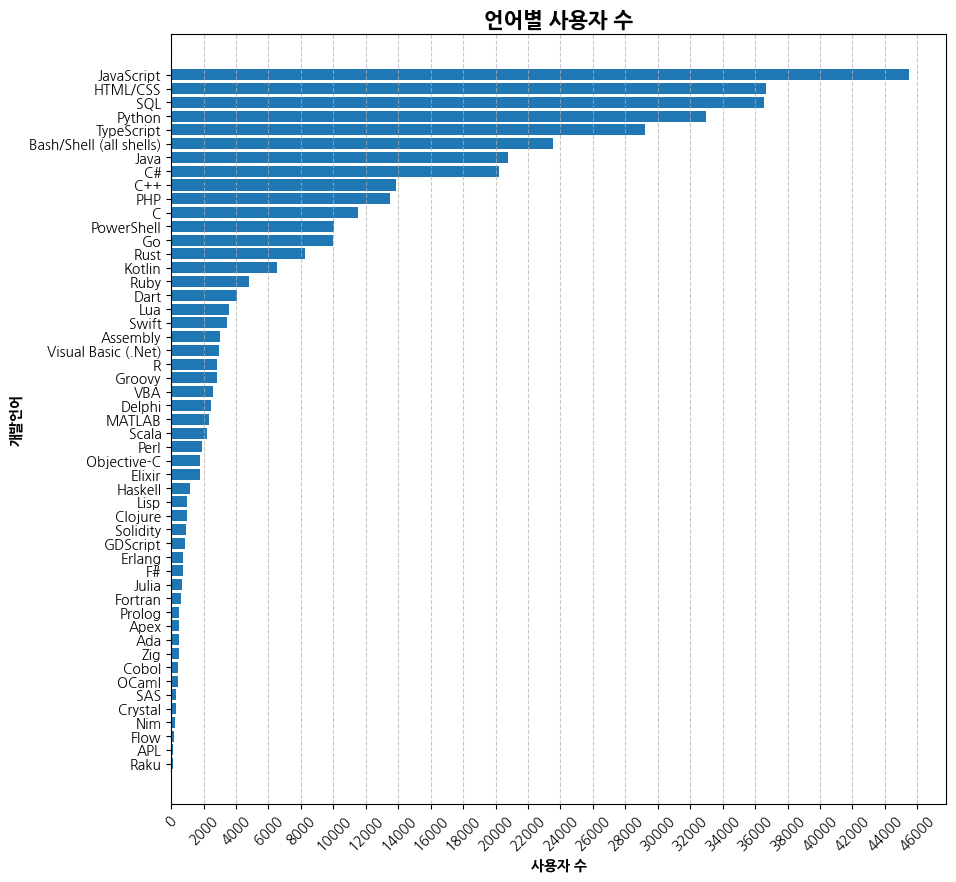

In [ ]:
standard_figsize = (10, 10)
plt.figure(figsize = standard_figsize)
plt.barh(width = lang_frequency.values, y=lang_frequency.index)

plt.title('언어별 사용자 수', fontsize=15, fontweight= 'bold')
plt.xlabel("사용자 수", fontweight= 'bold')
plt.ylabel("개발언어", fontweight= 'bold')
plt.xticks(np.arange(0, lang_frequency.values.max()+2000, 2000), rotation = 45)
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)
plt.show()

# TOP 10


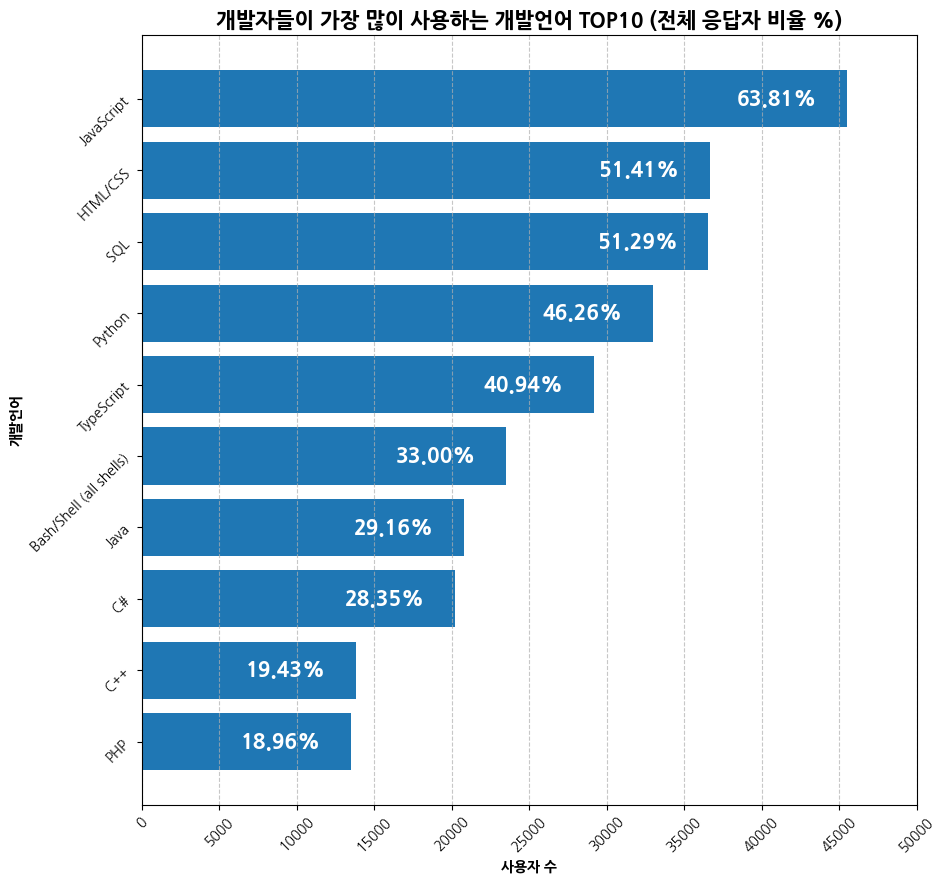

In [ ]:
# Series 의 nlargest 메서드
top10_lang = lang_frequency.nlargest(10).sort_values(ascending = True)
total_respondents =  devs_lang_df['ResponseId'].nunique()
top10_lang_percentage = (top10_lang / total_respondents) * 100


plt.figure(figsize = standard_figsize)
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)

lang_bars = plt.barh(width = top10_lang.values, y = top10_lang.index)
for bar, percentage in zip(lang_bars, top10_lang_percentage) :

    plt.text(x = bar.get_width() - top10_lang.values.max() * 0.1, y = bar.get_y() + bar.get_height() / 2, s = f'{percentage:.2f}%', color = 'white', fontsize = 15, fontweight = 'bold', va = 'center', ha = 'center')
# horizontal alignment
# vertical alignment
plt.title('개발자들이 가장 많이 사용하는 개발언어 TOP10 (전체 응답자 비율 %)', fontsize = 15, fontweight = 'bold')
plt.ylabel('개발언어', fontweight = 'bold')
plt.xlabel('사용자 수', fontweight = 'bold')
plt.xticks(np.arange(0, top10_lang.values.max()+5000, 5000), rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [ ]:
top10_lang_percentage

,count
LanguageHaveWorkedWith,
PHP,18.96
C++,19.43
C#,28.35
Java,29.16
Bash/Shell (all shells),33.00
TypeScript,40.94
Python,46.26
SQL,51.29
HTML/CSS,51.41


# 사용을 희망하는 언어

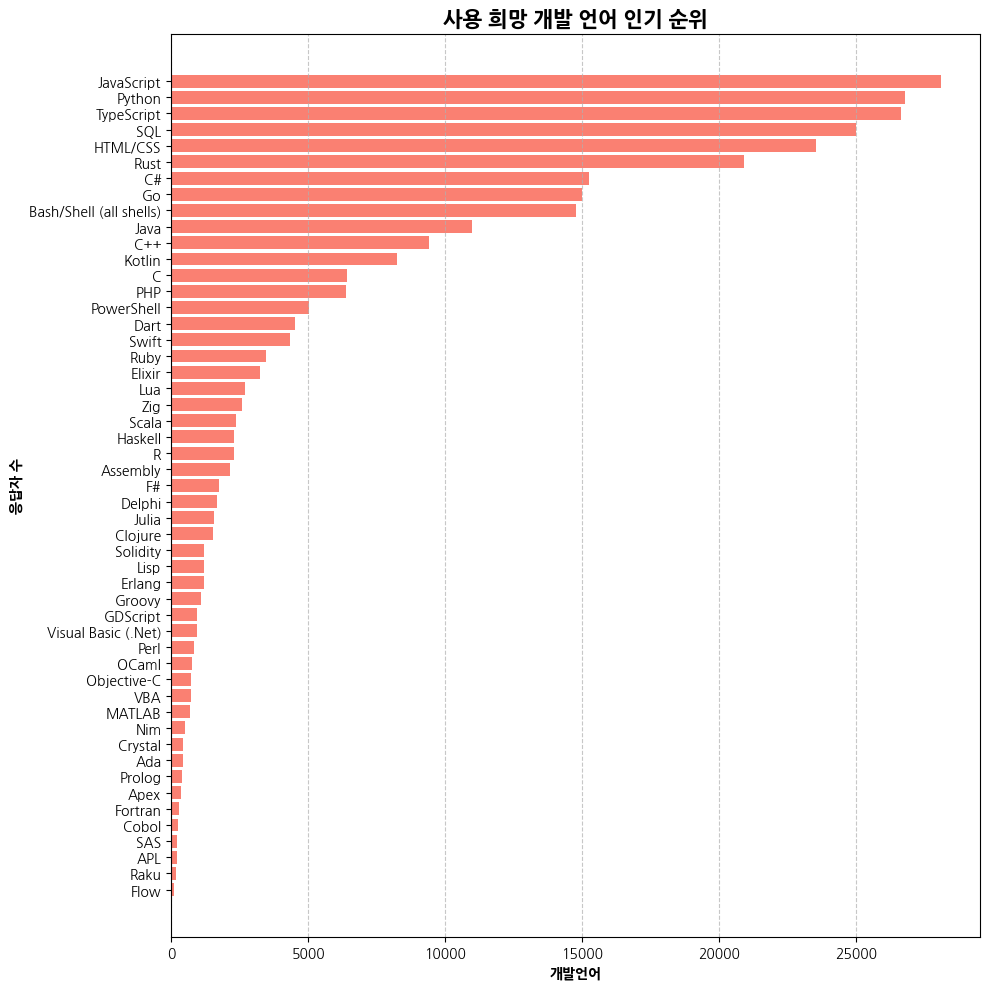

In [ ]:
prflang_frequency = devs_prflang_df['LanguageWantToWorkWith'].value_counts(ascending=True)

plt.figure(figsize = standard_figsize)
plt.barh(width = prflang_frequency.values, y = prflang_frequency.index, color = 'salmon')

plt.title("사용 희망 개발 언어 인기 순위", fontsize = 15, fontweight ='bold')
plt.xlabel("개발언어", fontweight = 'bold')
plt.ylabel("응답자 수", fontweight = 'bold')
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)
plt.xticks(np.arange(0, prflang_frequency.values.max()+1000, 5000))
plt.tight_layout()
plt.show()

In [ ]:
prflang_frequency.head()

,count
LanguageWantToWorkWith,
Flow,103
Raku,189
APL,215
SAS,221
Cobol,249


## TOP10

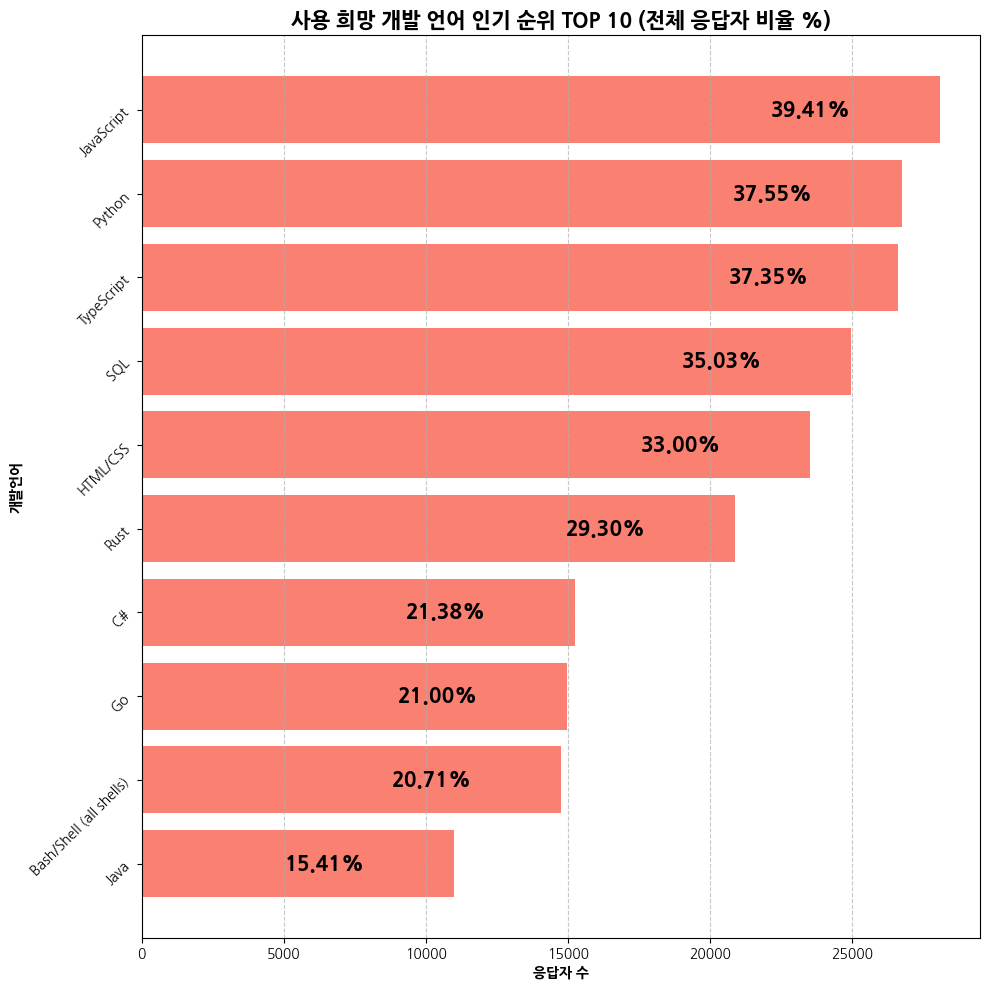

In [ ]:
top10_prflang = prflang_frequency.nlargest(10).sort_values(ascending = True)
# top10_prflang
total_respondents =  devs_lang_df['ResponseId'].nunique()
top10_prflang_percentage = (top10_prflang / total_respondents) * 100
# top10_prflang_percentage

plt.figure(figsize = standard_figsize)
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)

prf_lang_bars = plt.barh(width = top10_prflang.values, y = top10_prflang.index, color = 'salmon')

for bar, percentage in zip(prf_lang_bars, top10_prflang_percentage) :
    plt.text(x = bar.get_width() - top10_lang.values.max() * 0.1, y = bar.get_y() + bar.get_height() / 2, s = f'{percentage:.2f}%', fontsize = 15, fontweight = 'bold', va = 'center', ha = 'center')

plt.title('사용 희망 개발 언어 인기 순위 TOP 10 (전체 응답자 비율 %)', fontsize = 15, fontweight = 'bold')
plt.xlabel("응답자 수", fontweight = 'bold')
plt.ylabel("개발언어", fontweight = 'bold')
plt.xticks(np.arange(0, prflang_frequency.values.max()+1000, 5000))
plt.yticks(rotation = 45)
plt.tight_layout()
plt.show()

In [ ]:
# plt.figure(figsize = standard_figsize)
# plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)

# lang_bars = plt.barh(width = top10_lang.values, y = top10_lang.index)
# for bar, percentage in zip(lang_bars, top10_lang_percentage) :
#     plt.text(x = bar.get_width() - top10_lang.values.max() * 0.1, y = bar.get_y() + bar.get_height() / 2, s = f'{percentage:.2f}%', color = 'white', fontsize = 15, fontweight = 'bold', va = 'center', ha = 'center')

# # horizontal alignment
# # vertical alignment
# plt.title('개발자들이 가장 많이 사용하는 개발언어 TOP10 (전체 응답자 비율 %)', fontsize = 15, fontweight = 'bold')
# plt.ylabel('개발언어', fontweight = 'bold')
# plt.xlabel('사용자 수', fontweight = 'bold')
# plt.xticks(np.arange(0, top10_lang.values.max()+5000, 5000), rotation = 45)
# plt.yticks(rotation = 45)
# plt.show()

# 언어별 사용자 수 vs 사용 희망자 수


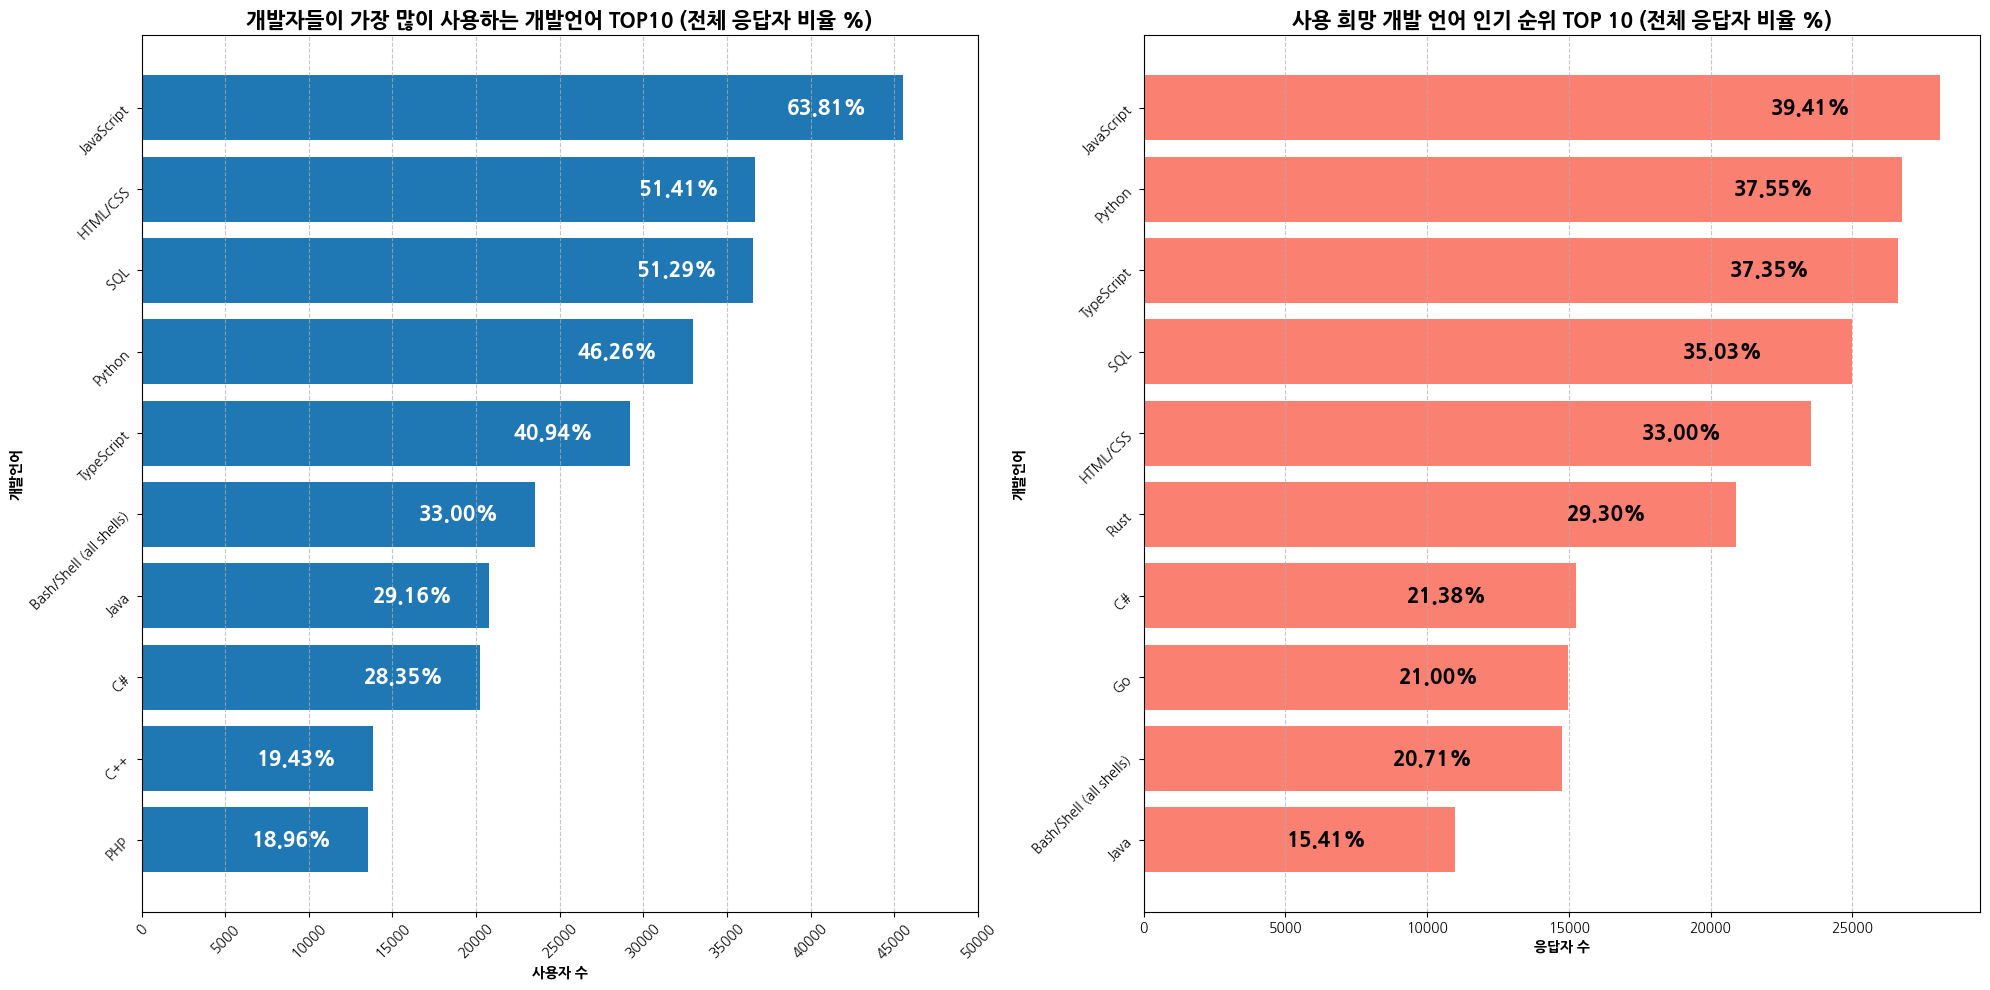

In [ ]:
# figure 를 잡고
# subplot 그리고

plt.figure(figsize = (20, 10))

# 그래프 1 : 현재 사용 언어
plt.subplot(1, 2, 1)

plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)

lang_bars = plt.barh(width = top10_lang.values, y = top10_lang.index)
for bar, percentage in zip(lang_bars, top10_lang_percentage) :

    plt.text(x = bar.get_width() - top10_lang.values.max() * 0.1, y = bar.get_y() + bar.get_height() / 2, s = f'{percentage:.2f}%', color = 'white', fontsize = 15, fontweight = 'bold', va = 'center', ha = 'center')
# horizontal alignment
# vertical alignment
plt.title('개발자들이 가장 많이 사용하는 개발언어 TOP10 (전체 응답자 비율 %)', fontsize = 15, fontweight = 'bold')
plt.ylabel('개발언어', fontweight = 'bold')
plt.xlabel('사용자 수', fontweight = 'bold')
plt.xticks(np.arange(0, top10_lang.values.max()+5000, 5000), rotation = 45)
plt.yticks(rotation = 45)

# 그래프 2 : 사용 희망 언어
plt.subplot(1, 2, 2)

plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)

prf_lang_bars = plt.barh(width = top10_prflang.values, y = top10_prflang.index, color = 'salmon')

for bar, percentage in zip(prf_lang_bars, top10_prflang_percentage) :
    plt.text(x = bar.get_width() - top10_lang.values.max() * 0.1, y = bar.get_y() + bar.get_height() / 2, s = f'{percentage:.2f}%', fontsize = 15, fontweight = 'bold', va = 'center', ha = 'center')

plt.title('사용 희망 개발 언어 인기 순위 TOP 10 (전체 응답자 비율 %)', fontsize = 15, fontweight = 'bold')
plt.xlabel("응답자 수", fontweight = 'bold')
plt.ylabel("개발언어", fontweight = 'bold')
plt.xticks(np.arange(0, prflang_frequency.values.max()+1000, 5000))
plt.yticks(rotation = 45)

plt.tight_layout()
plt.show()


# 언어별 사용자 수 vs 사용 희망자 : stacked bar

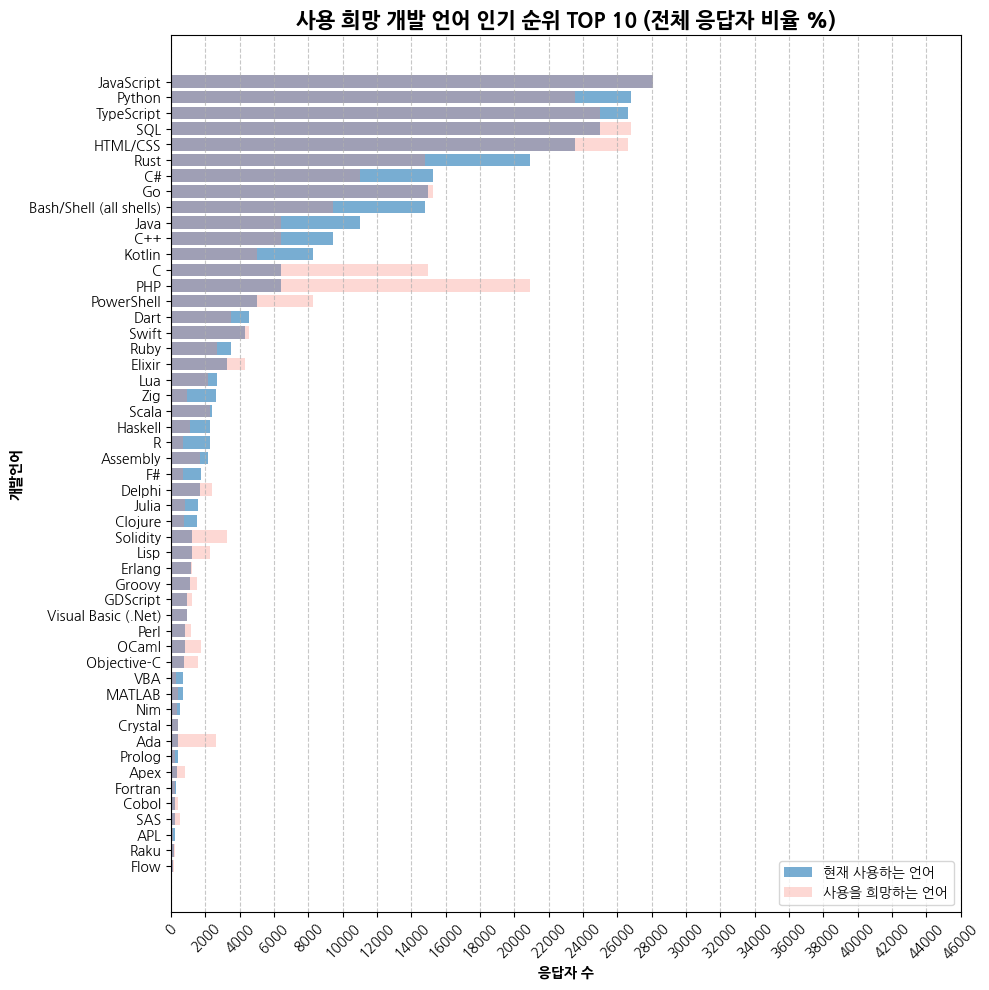

In [ ]:
# y축 데이터 수를 맞추어줄 필요가 있음

plt.figure(figsize = standard_figsize)

plt.barh(width = prflang_frequency.values
         , y = np.arange(len(prflang_frequency.index))
         , tick_label = prflang_frequency.index
         , alpha = 0.6)

for idx, lang in enumerate(lang_frequency.index) :
    prflang_count = prflang_frequency.loc[lang]
    plt.barh(y = idx, width = prflang_count, color = 'salmon', alpha = 0.3)

plt.title('사용 희망 개발 언어 인기 순위 TOP 10 (전체 응답자 비율 %)', fontsize = 15, fontweight = 'bold')
plt.xlabel("응답자 수", fontweight = 'bold')
plt.ylabel("개발언어", fontweight = 'bold')
plt.xticks(np.arange(0, max(lang_frequency.values.max(), prflang_frequency.values.max())+2000, 2000), rotation = 45)
# plt.yticks(rotation = 45)
plt.grid(axis = 'x', linestyle='--', alpha = 0.7)
plt.legend(["현재 사용하는 언어", "사용을 희망하는 언어"], loc = 'lower right')
plt.tight_layout()
plt.show()

# plt.barh(width = prflang_frequency.values, y = prflang_frequency.index, color = 'salmon')



# 데이터 직군상위 언어


In [ ]:
devs_lang_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373563 entries, 0 to 89182
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ResponseId              373563 non-null  int64  
 1   MainBranch              373563 non-null  object 
 2   Age                     373563 non-null  object 
 3   Employment              373563 non-null  object 
 4   RemoteWork              373563 non-null  object 
 5   EdLevel                 373563 non-null  object 
 6   YearsCodePro            334685 non-null  float64
 7   DevType                 373563 non-null  object 
 8   Country                 373563 non-null  object 
 9   Currency                330330 non-null  object 
 10  CompTotal               247026 non-null  float64
 11  LanguageHaveWorkedWith  373202 non-null  object 
 12  LanguageWantToWorkWith  345903 non-null  object 
 13  WorkExp                 226946 non-null  float64
 14  Industry                19

In [ ]:
print(DATA_DEVS)
data_lang_df = devs_lang_df[devs_lang_df['DevType'].isin(DATA_DEVS)]
data_prflang_df = devs_prflang_df[devs_prflang_df['DevType'].isin(DATA_DEVS)]

data_lang_prequency = data_lang_df['LanguageHaveWorkedWith'].value_counts(ascending=True)
data_prflang_prequency = data_prflang_df['LanguageWantToWorkWith'].value_counts(ascending=True)

data_top10_lang = data_lang_prequency.nlargest(10).sort_values(ascending = True)
data_top10_prflang = data_prflang_prequency.nlargest(10).sort_values(ascending = True)


# display(
#     data_lang_df.head(3)
#     , data_prflang_df.head(3)
# )


['Data or business analyst', 'Data scientist or machine learning specialist', 'Engineer, data']


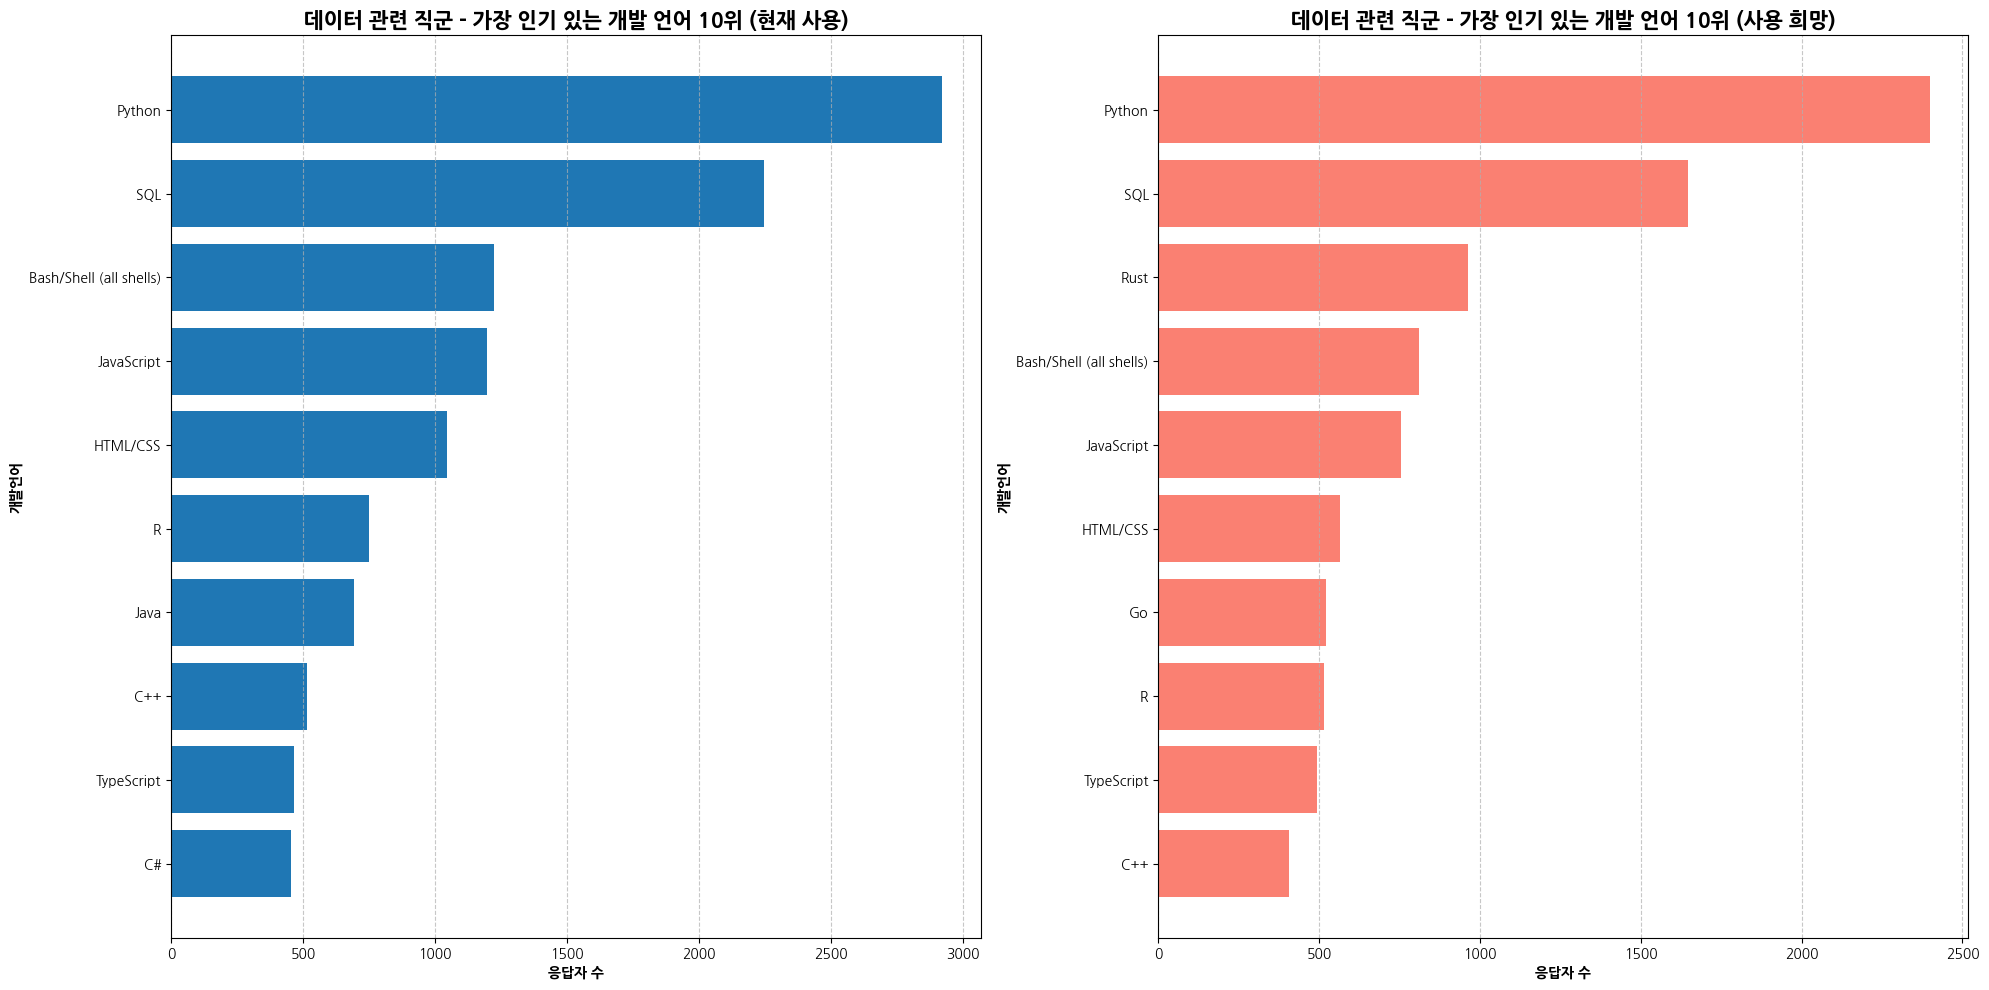

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (20, 10))

axes[0].barh(width = data_top10_lang.values, y = data_top10_lang.index)
axes[0].set_title('데이터 관련 직군 - 가장 인기 있는 개발 언어 10위 (현재 사용)', fontsize = 15, fontweight = 'bold')
axes[0].set_xlabel('응답자 수', fontweight = 'bold')
axes[0].set_ylabel('개발언어', fontweight = 'bold')
axes[0].grid(axis = 'x', linestyle = '--', alpha = 0.7)

axes[1].barh(width = data_top10_prflang.values, y = data_top10_prflang.index, color = 'salmon')
axes[1].set_title('데이터 관련 직군 - 가장 인기 있는 개발 언어 10위 (사용 희망)', fontsize = 15, fontweight = 'bold')
axes[1].set_xlabel('응답자 수', fontweight = 'bold')
axes[1].set_ylabel('개발언어', fontweight = 'bold')
axes[1].grid(axis = 'x', linestyle = '--', alpha = 0.7)

plt.tight_layout()
plt.show()

# 데이터 직군별 상세 비교

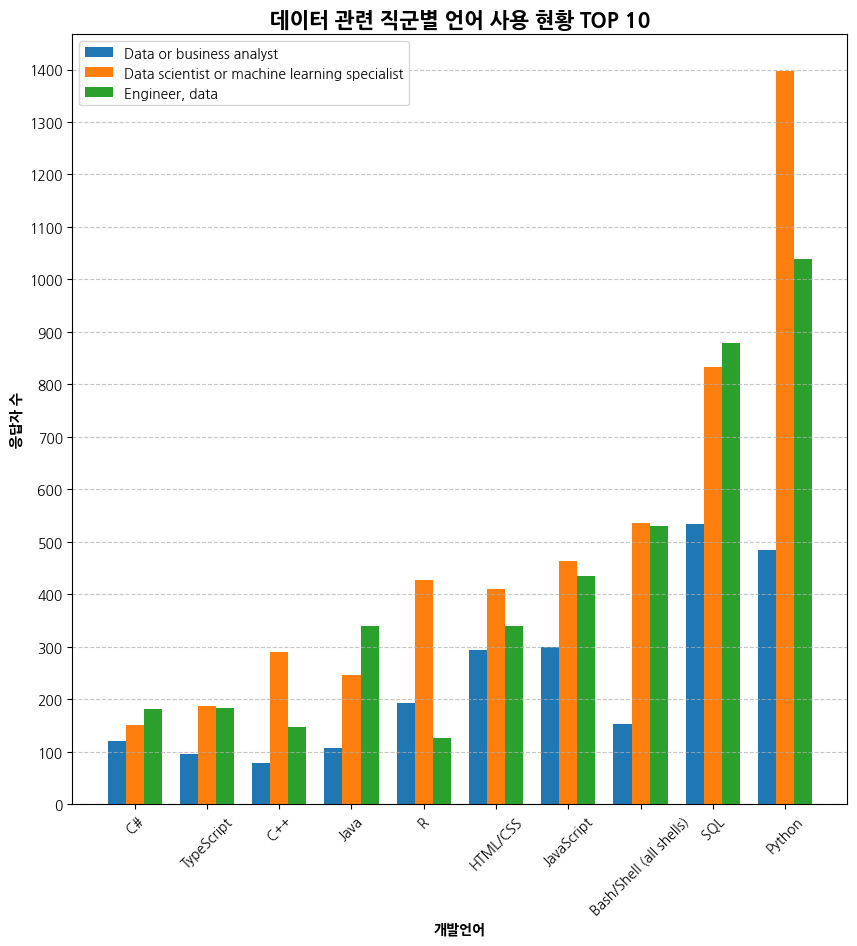

In [ ]:
plt.figure(figsize = standard_figsize)

# 겹친 bar를 3개로 분리
x_indices = np.arange(len(data_top10_lang.index))
bar_width = 0.25

for idx, dev_type in enumerate(DATA_DEVS) :
    # 해당 직군 = dev_type 데이터를 필터링 한다 (lang_df)
    filtered_data_lang_df = data_lang_df[data_lang_df['DevType'] == dev_type]

    # 필터링된 데이터의 언어 사용빈도 계산 (lang_freqeuncy)
    data_lang_frequency = filtered_data_lang_df['LanguageHaveWorkedWith'].value_counts()

    # 상위 10개 언어에 대한 빈도만 선택
    data_lang_frequency_top10 = data_lang_frequency[data_lang_frequency.index.isin(data_top10_lang.index)]

    values = [data_lang_frequency_top10[lang] for lang in data_top10_lang.index]

    # 해당 직군의 막대를 그림
    plt.bar(height = values, x = x_indices + idx * bar_width, width = bar_width, label = dev_type)

    # legend
    # xlabel

plt.xticks(x_indices + bar_width, data_top10_lang.index, rotation = 45)
plt.yticks(np.arange(0, data_lang_frequency.values.max()+400, 100))

plt.xlabel('개발언어', fontweight = 'bold')
plt.ylabel('응답자 수', fontweight = 'bold')
plt.title('데이터 관련 직군별 언어 사용 현황 TOP 10', fontsize = 15, fontweight = 'bold')
plt.legend()
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

# data_top10_lang = data_lang_prequency.nlargest(10).sort_values(ascending = True)
# data_top10_prflang = data_prflang_prequency.nlargest(10).sort_values(ascending = True)


# 언어별 주요 직군

In [ ]:

## 비중이 높은  'Developer, full-stack', 'Developer, back-end' 항목을 제외
filtered_df = devs_lang_df[(devs_lang_df['DevType'] != 'Developer, full-stack') & (devs_lang_df['DevType'] != 'Developer, back-end')]

grouped_df = filtered_df.groupby(['LanguageHaveWorkedWith', 'DevType'])['ResponseId'].count().reset_index(name = 'Count')
grouped_df_sorted = grouped_df.sort_values(['LanguageHaveWorkedWith', 'Count'], ascending = [True, False])

top3_devtypes_by_lang = grouped_df_sorted.groupby('LanguageHaveWorkedWith').head(3)
top3_devtypes_by_lang_sorted = top3_devtypes_by_lang.sort_values(['LanguageHaveWorkedWith', 'Count'], ascending = [False, True]).reset_index(drop = True)


total_count_by_lang = grouped_df.groupby('LanguageHaveWorkedWith')['Count'].sum().reset_index(name = 'TotalCount')

top3_devtypes_by_lang_with_total = pd.merge(top3_devtypes_by_lang_sorted, total_count_by_lang, on = 'LanguageHaveWorkedWith')
top3_devtypes_by_lang_with_total['Percentage'] = (top3_devtypes_by_lang_with_total['Count'] / top3_devtypes_by_lang_with_total['TotalCount']) * 100
top3_devtypes_by_lang_with_total.head()

,LanguageHaveWorkedWith,DevType,Count,TotalCount,Percentage
0,Zig,"Developer, game or graphics",24,255,9.41
1,Zig,"Developer, desktop or enterprise applications",26,255,10.20
2,Zig,"Developer, embedded applications or devices",27,255,10.59
3,Visual Basic (.Net),"Developer, front-end",77,1332,5.78
4,Visual Basic (.Net),Other (please specify):,128,1332,9.61


In [ ]:
# y값에 넣을 index 값 준비

# 해당하는 인덱스, 언어를 넣어줄 리스트 준비
y_positions = []

current_language = None

for idx, row in top3_devtypes_by_lang_sorted.iterrows() :
    if current_language != row['LanguageHaveWorkedWith'] :
        current_language = row['LanguageHaveWorkedWith']
        y_positions.append((current_language, idx+2))
        # idx + 2 는 기존 y 축에서 바그래프를 2씩 위로 올려주려는 목적

y_labels, y_ticks = zip(*y_positions) # unzipping

In [ ]:
unique_devtypes = top3_devtypes_by_lang['DevType'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_devtypes)))
color_map = {devtype: color for devtype, color in zip(unique_devtypes, colors)}
#color_map

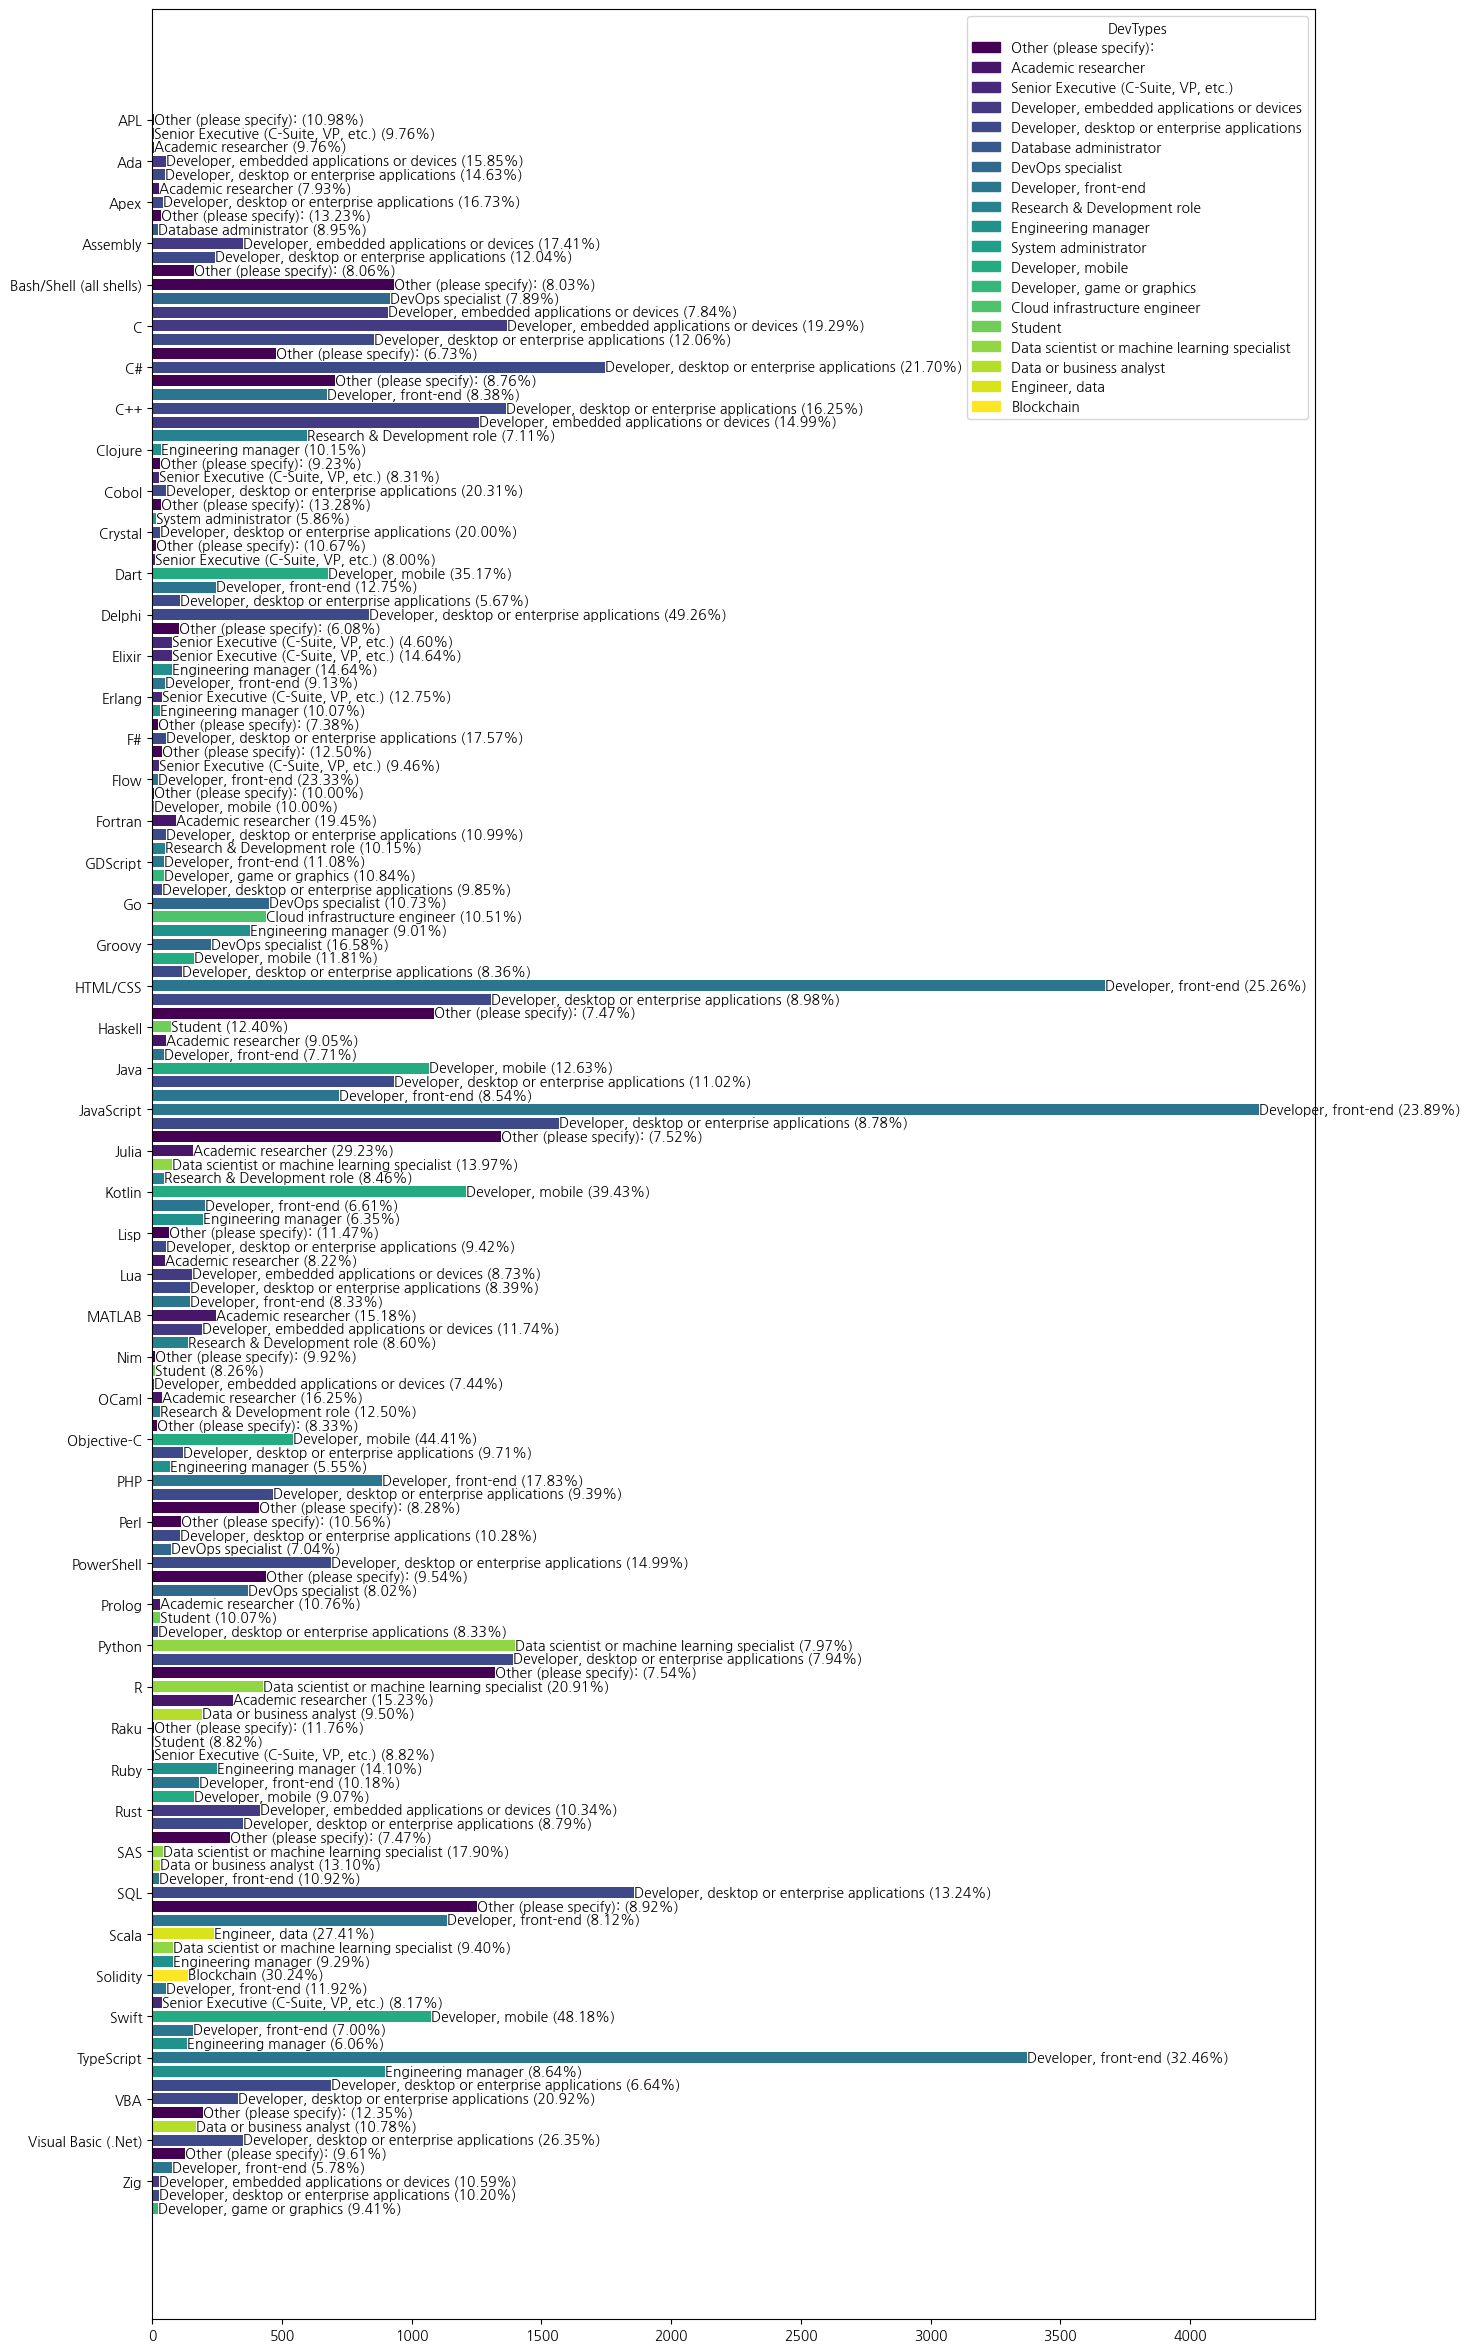

In [ ]:
plt.figure(figsize = (15, 30))

top3_dev_bars = plt.barh(
    y = top3_devtypes_by_lang_sorted.index ,
    width= top3_devtypes_by_lang_sorted['Count'],
    color = [color_map.get(devtype) for devtype in top3_devtypes_by_lang_sorted['DevType']])
plt.yticks(y_ticks, y_labels)

for bar, (devtype, percentage) in zip(top3_dev_bars, top3_devtypes_by_lang_with_total[['DevType', 'Percentage']].values) :
    plt.text(x = bar.get_width(),
             y = bar.get_y() + bar.get_height() / 2,
             s = f'{devtype} ({percentage:.2f}%)',
             va = 'center',
             ha = 'left',
             fontsize = 10)

plt.legend([plt.Rectangle(xy = (0,0), width = 1, height = 1, color = color_map[devtype]) for devtype in unique_devtypes], unique_devtypes
           , title = 'DevTypes'
           , loc = 'upper right')
plt.show()

In [ ]:
# fullstack 데이터의 이상치 점검
devs_lang_df['DevType'].value_counts(normalize = True)

,proportion
DevType,
"Developer, full-stack",0.38
"Developer, back-end",0.16
"Developer, front-end",0.05
"Developer, desktop or enterprise applications",0.05
Other (please specify):,0.03
"Developer, mobile",0.03
Engineering manager,0.03
"Developer, embedded applications or devices",0.03
"Senior Executive (C-Suite, VP, etc.)",0.02


# 언어별 연봉

In [ ]:
## 전체 연봉 분포

In [ ]:
comp_sr = devs_df_comp['CompTotalKrw']

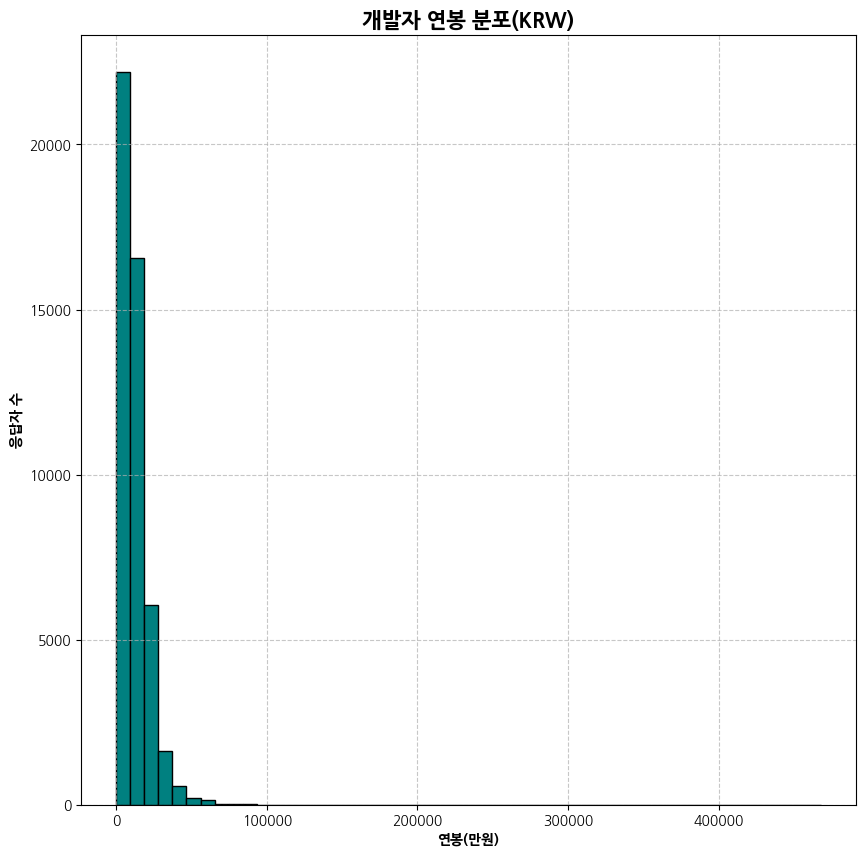

In [ ]:
plt.figure(figsize = standard_figsize)
plt.hist(comp_sr, bins = 50, color = 'teal', edgecolor = 'black')
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.title('개발자 연봉 분포(KRW)', fontsize = 15, fontweight = 'bold')
plt.xlabel('연봉(만원)', fontweight = 'bold')
plt.ylabel('응답자 수', fontweight = 'bold')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)
plt.show()



In [ ]:
## 로그변환을 통한 데이터 편차 축소

### log(x+1)을 계산해주는 함수
log_comp_sr = np.log1p(comp_sr)


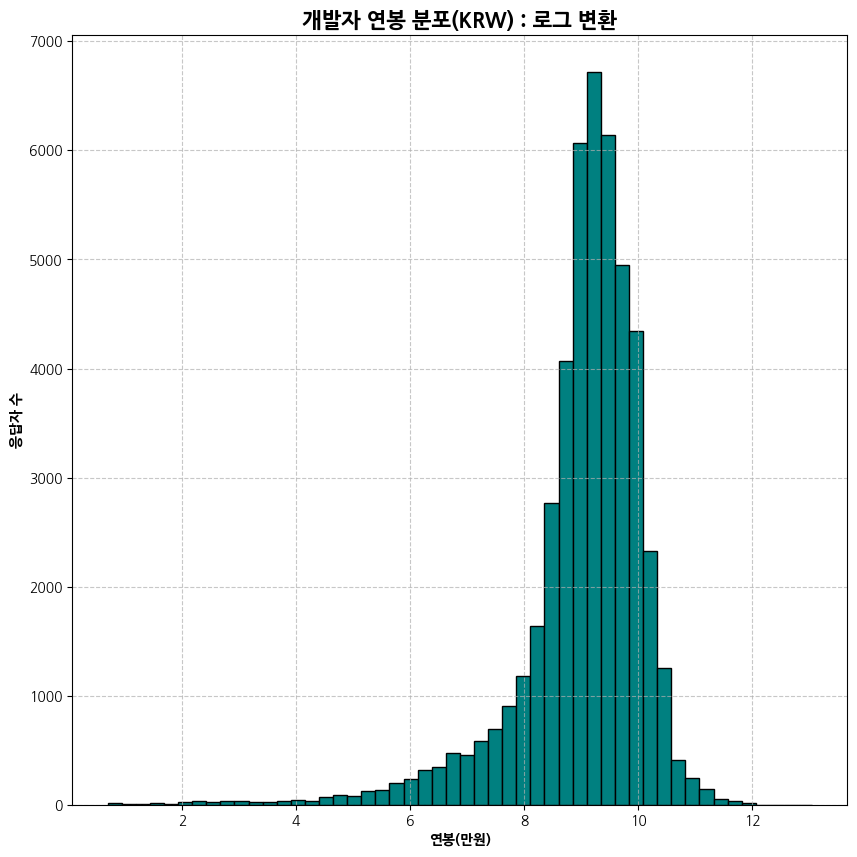

In [ ]:
plt.figure(figsize = standard_figsize)
plt.hist(log_comp_sr, bins = 50, color = 'teal', edgecolor = 'black')
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.title('개발자 연봉 분포(KRW) : 로그 변환', fontsize = 15, fontweight = 'bold')
plt.xlabel('연봉(만원)', fontweight = 'bold')
plt.ylabel('응답자 수', fontweight = 'bold')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)
plt.show()



# 언어별 연봉 중간값

In [ ]:
# pd.merge()
# devs_df_comp.info()
# devs_lang_df.info()

COMP_KRW = 'CompTotalKrw'
merged_df = pd.merge(devs_lang_df, devs_df_comp[['ResponseId', 'CompTotalKrw']], on = 'ResponseId', how = 'inner')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245100 entries, 0 to 245099
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ResponseId              245100 non-null  int64  
 1   MainBranch              245100 non-null  object 
 2   Age                     245100 non-null  object 
 3   Employment              245100 non-null  object 
 4   RemoteWork              245100 non-null  object 
 5   EdLevel                 245100 non-null  object 
 6   YearsCodePro            244300 non-null  float64
 7   DevType                 245100 non-null  object 
 8   Country                 245100 non-null  object 
 9   Currency                245100 non-null  object 
 10  CompTotal               245100 non-null  float64
 11  LanguageHaveWorkedWith  244971 non-null  object 
 12  LanguageWantToWorkWith  228197 non-null  object 
 13  WorkExp                 169628 non-null  float64
 14  Industry            

In [ ]:
median_salary_by_lang = merged_df.groupby('LanguageHaveWorkedWith')[COMP_KRW].median().sort_values(ascending = True).reset_index()

In [ ]:
## 함수화

COMP_KRW = 'CompTotalKrw'
def draw_median_salary_barh (df, target, title, ylabel, figsize = standard_figsize) :
    plt.figure(figsize = figsize)
    plt.barh(y = df[target], width = df[COMP_KRW])

    plt.xlabel('연봉 중간값 (KRW, 만원)', fontweight = 'bold')
    plt.ylabel(ylabel, fontweight = 'bold')
    plt.title(title, fontsize = 15, fontweight = 'bold')
    plt.xticks(np.arange(0, df[COMP_KRW].values.max() + 1000, 1000), rotation = 45)
    plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)

    plt.show()



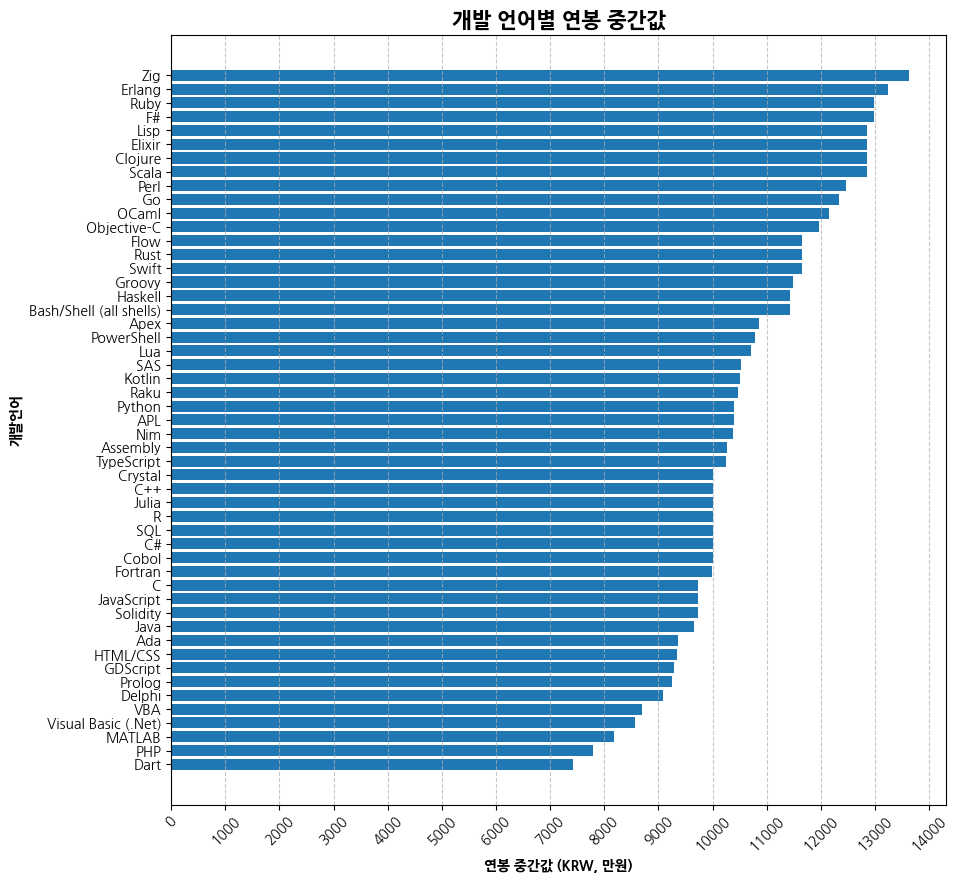

In [ ]:
draw_median_salary_barh(df=median_salary_by_lang, target = 'LanguageHaveWorkedWith', title = '개발 언어별 연봉 중간값', ylabel = '개발언어')

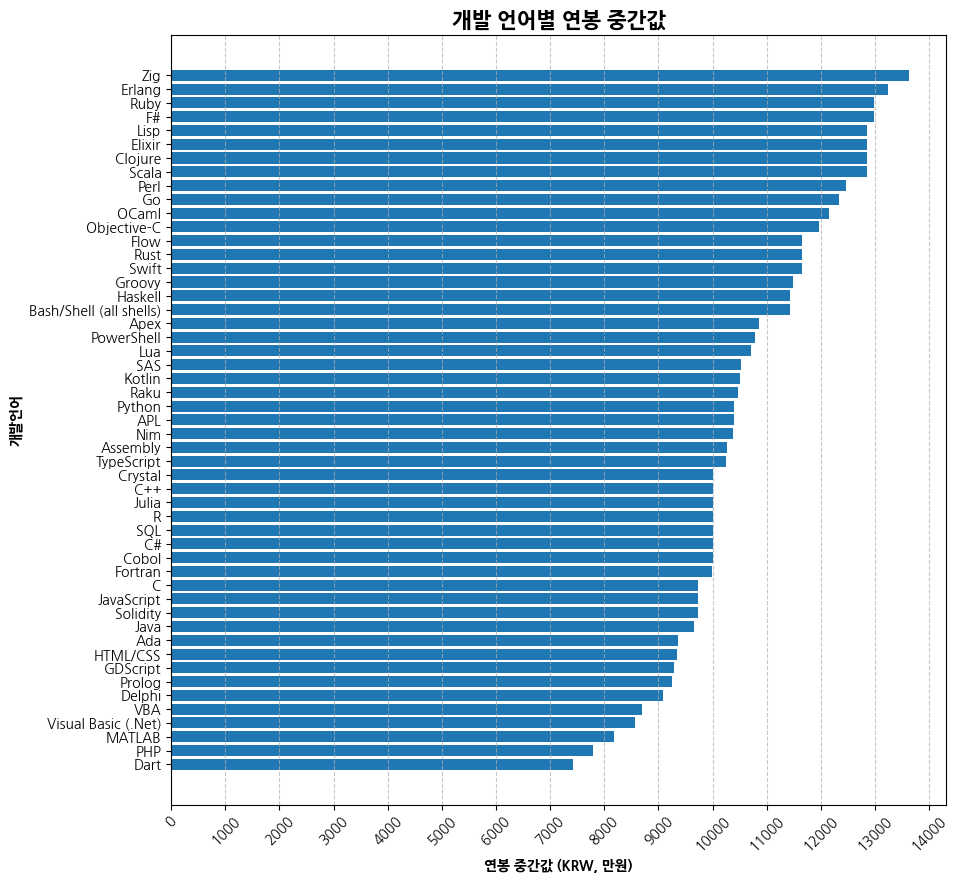

In [ ]:
# 초안
plt.figure(figsize = standard_figsize)
plt.barh(y = median_salary_by_lang['LanguageHaveWorkedWith'], width = median_salary_by_lang[COMP_KRW])

plt.xlabel('연봉 중간값 (KRW, 만원)', fontweight = 'bold')
plt.ylabel('개발언어', fontweight = 'bold')
plt.title('개발 언어별 연봉 중간값', fontsize = 15, fontweight = 'bold')

plt.xticks(np.arange(0, median_salary_by_lang[COMP_KRW].values.max() + 1000, 1000), rotation = 45)

plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)
plt.show()

# 언어별 연봉 분포